# GUÍA 7: PREDICCIÓN DE DESERCIÓN DE ALUMNOS Y POSIBLES CONTRAFACTUALES

Alumno: Ricardo Amiel Acuña Villogas

## ANÁLISIS DE DATOS

In [1]:
import pandas as pd

df = pd.read_csv("5.data_desercion_IND.csv", sep= ';', encoding='latin1')
df.head()

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC,NOTA_ENCUESTA_DOC_GRUPO
0,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,7.26,N,5,48,30,7.7933,217,0,0,NaN
1,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,7.35,N,0,64,30,7.7933,217,0,0,NaN
2,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,10.20,N,0,48,30,7.7933,217,0,0,NaN
3,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,12.29,S,6,48,30,7.7933,217,0,0,NaN
4,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,8.50,N,8,64,30,7.7933,217,0,0,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299867 entries, 0 to 299866
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   COD_PERSONA              299867 non-null  int64  
 1   COD_ALUMNO               299867 non-null  int64  
 2   SEXO                     299867 non-null  object 
 3   FECHA_NACIMIENTO         299835 non-null  float64
 4   PROCEDENCIA              299867 non-null  object 
 5   RESIDENCIA               299867 non-null  object 
 6   PER_INGRESO              299867 non-null  object 
 7   ESTADO_CIVIL             299867 non-null  object 
 8   TIPO_COLEGIO             289238 non-null  object 
 9   PTJE_INGRESO             272823 non-null  float64
 10  CARRERA                  299867 non-null  object 
 11  ESTADO                   299867 non-null  object 
 12  SEM_ALUMNO               299867 non-null  int64  
 13  SEM_CURSADOS             299867 non-null  int64  
 14  CANT

# LIMPIEZA DE DATOS

Esta son las columnas con NAs

 3   FECHA_NACIMIENTO         299835 non-null  float64 # 32 NAs 
 
 8   TIPO_COLEGIO             289238 non-null  object  # aprox 10k NAs 
 
 9   PTJE_INGRESO             272823 non-null  float64 # aprox 27k NAs 
 
 32  NOTA_ENCUESTA_DOC_GRUPO  99980 non-null   float64 # más de la mitad de NAs

**Crear función para ver cuantos NAs hay por columna y por fila**

In [3]:
def count_nas(df):
    nas_per_column = df.isna().sum()
    nas_per_row = df.isna().sum(axis=1)
    return nas_per_column[nas_per_column > 0], nas_per_row[nas_per_row > 0]

nas_per_column, nas_per_row = count_nas(df)
print("Columns with NAs:\n", nas_per_column)
print("\nNAs per row:\n", nas_per_row)

Columns with NAs:
 FECHA_NACIMIENTO               32
TIPO_COLEGIO                10629
PTJE_INGRESO                27044
NOTA_ENCUESTA_DOC_GRUPO    199887
dtype: int64

NAs per row:
 0         3
1         3
2         3
3         3
4         3
         ..
299862    1
299863    1
299864    1
299865    1
299866    1
Length: 202827, dtype: int64


### Limpieza de fecha de nacimiento

In [4]:
alumnos_na_fecha_nacimiento = df[df['FECHA_NACIMIENTO'].isna()]
print(alumnos_na_fecha_nacimiento)

        COD_PERSONA  COD_ALUMNO SEXO  FECHA_NACIMIENTO PROCEDENCIA RESIDENCIA  \
1742            457        4198    M               NaN          //         //   
1743            457        4198    M               NaN          //         //   
1744            457        4198    M               NaN          //         //   
1745            457        4198    M               NaN          //         //   
2591           1423        4203    F               NaN          //         //   
2592           1423        4203    F               NaN          //         //   
2593           1423        4203    F               NaN          //         //   
2594           1423        4203    F               NaN          //         //   
2595           1423        4203    F               NaN          //         //   
2596           1423        4203    F               NaN          //         //   
2597           1423        4203    F               NaN          //         //   
12740           457        4

Visualizando el dataset, podemos ver que se pierde la fecha de nacimiento en todos los semestres de los alumnos encontrados. Y no solo eso, si no tiene la fecha de nacimiento, tampoco tiene la **procedencia y residencia**, ni el ptje ingreso ni el tipo de colegio ni la nota grupal de encuesta, las cuales están asignadas como //.

In [5]:
df_fecha_nac_na = df[df['FECHA_NACIMIENTO'].isna()]
df_fecha_nac_na.head()

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC,NOTA_ENCUESTA_DOC_GRUPO
1742,457,4198,M,NaN,//,//,2005-01,S,NaN,NaN,...,14.15,S,13,64,30,10.4055,217,0,0,NaN
1743,457,4198,M,NaN,//,//,2005-01,S,NaN,NaN,...,15.70,S,12,64,30,10.4055,217,0,0,NaN
1744,457,4198,M,NaN,//,//,2005-01,S,NaN,NaN,...,2.05,N,12,64,30,10.4055,217,0,0,NaN
1745,457,4198,M,NaN,//,//,2005-01,S,NaN,NaN,...,9.38,N,14,48,30,10.4055,217,0,0,NaN
2591,1423,4203,F,NaN,//,//,2005-01,S,NaN,NaN,...,0.95,N,22,64,30,9.1484,217,0,0,NaN


In [6]:
unique_cod_alumno = alumnos_na_fecha_nacimiento['COD_ALUMNO'].unique()
for cod_alumno in unique_cod_alumno:
    print(f'Código de alumno: {cod_alumno}')
print(f"Number of unique COD_ALUMNO: {len(unique_cod_alumno)}")

Código de alumno: 4198
Código de alumno: 4203
Código de alumno: 27616
Código de alumno: 36354
Código de alumno: 36346
Código de alumno: 34682
Number of unique COD_ALUMNO: 6


In [7]:
# query todos los records con COD_ALUMNO 4198, 4203, 27616, 36354, 36346, 34682
df_4198 = df[df['COD_ALUMNO'] == 34682]
df_4198

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC,NOTA_ENCUESTA_DOC_GRUPO
236392,35018,34682,F,NaN,//,//,2017-02,S,NaN,NaN,...,13.88,S,14,68,30,13.88,217,0,0,17.75243


Borraremos todas las filas de con FECHA DE NACIMIENTO VACÍO

In [8]:
df_cleaned = df.dropna(subset=['FECHA_NACIMIENTO'])
#reset index
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC,NOTA_ENCUESTA_DOC_GRUPO
0,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,7.26,N,5,48,30,7.7933,217,0,0,NaN
1,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,7.35,N,0,64,30,7.7933,217,0,0,NaN
2,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,10.20,N,0,48,30,7.7933,217,0,0,NaN
3,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,12.29,S,6,48,30,7.7933,217,0,0,NaN
4,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,8.50,N,8,64,30,7.7933,217,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299830,23012,31356,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.0,...,15.26,S,0,68,30,13.2567,217,0,0,NaN
299831,26191,25960,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.0,...,16.69,S,0,68,30,14.3500,217,0,0,NaN
299832,25883,26100,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.0,...,16.91,S,0,68,30,15.9857,217,0,0,NaN
299833,29759,29405,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.0,...,16.69,S,0,68,30,15.8629,217,0,0,NaN


In [9]:
nas_per_column, nas_per_row = count_nas(df_cleaned)
print("Columns with NAs:\n", nas_per_column)
print("\nNAs per row:\n", nas_per_row)

Columns with NAs:
 TIPO_COLEGIO                10597
PTJE_INGRESO                27012
NOTA_ENCUESTA_DOC_GRUPO    199869
dtype: int64

NAs per row:
 0         3
1         3
2         3
3         3
4         3
         ..
299830    1
299831    1
299832    1
299833    1
299834    1
Length: 202795, dtype: int64


### Limpieza de Nota de encuesta por grupo

Más de la mitad de los datos se perdió, y coincidía que en todos los NAs posibles de otras columnas, está presente esta variable, por lo que será eliminada

In [10]:
df_cleaned = df_cleaned.drop(columns=['NOTA_ENCUESTA_DOC_GRUPO'])
df_cleaned.head()

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5,48,30,7.7933,217,0,0
1,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0,64,30,7.7933,217,0,0
2,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0,48,30,7.7933,217,0,0
3,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6,48,30,7.7933,217,0,0
4,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8,64,30,7.7933,217,0,0


In [11]:
nas_per_column, nas_per_row = count_nas(df_cleaned)
print("Columns with NAs:\n", nas_per_column)
print("\nNAs per row:\n", nas_per_row)

Columns with NAs:
 TIPO_COLEGIO    10597
PTJE_INGRESO    27012
dtype: int64

NAs per row:
 0         2
1         2
2         2
3         2
4         2
         ..
299469    1
299570    1
299670    1
299673    1
299753    1
Length: 36822, dtype: int64


## TRANSFORMACIÓN DE DATOS 

Ocuparemos técnicas de imputación para las siguientes 4 variables:

1. Procedencia
2. Residencia
3. Tipo de Colegio
4. Puntaje de ingreso

Veamos como se distribuye el tipo de colegio, para ver imputarlo por un descriptor estadístico valdría la pena, y no genere sesgo

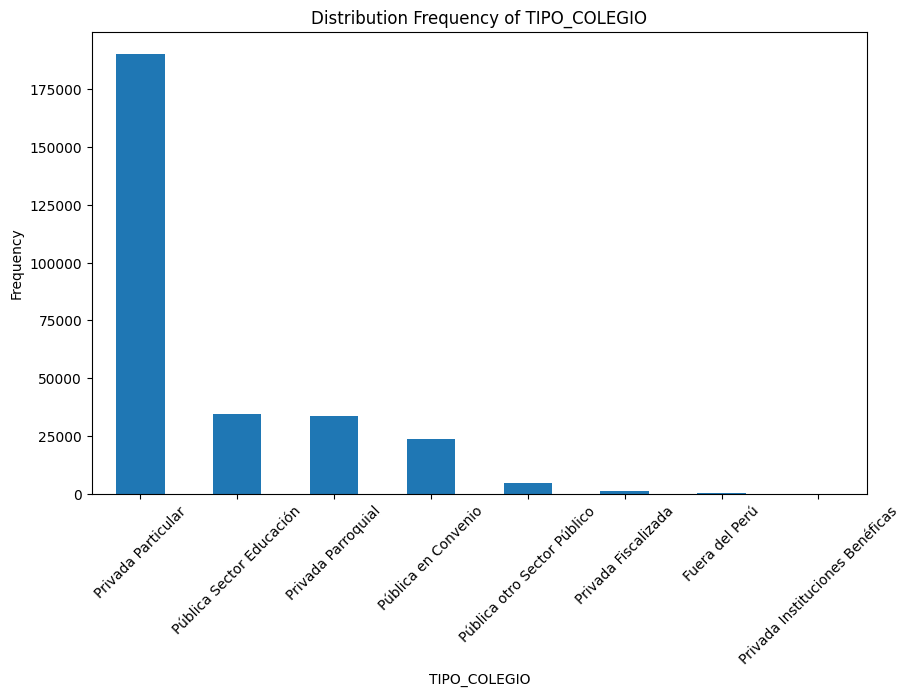

In [12]:
import matplotlib.pyplot as plt

# Drop NaN values for TIPO_COLEGIO
tipo_colegio_counts = df_cleaned['TIPO_COLEGIO'].dropna().value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
tipo_colegio_counts.plot(kind='bar')
plt.title('Distribution Frequency of TIPO_COLEGIO')
plt.xlabel('TIPO_COLEGIO')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Imputar moda, haría que se genere sesgo, ya que cabe la posiblidad de que hayan alumnos con datos que muestren dificultades para afrontar el estudio (socioeconómicos) como estudiantes de una institución privada particular. (**Insight**)

Ahora veamos sus records con datos faltantes

In [13]:
df_na_tipo_colegio = df[df['TIPO_COLEGIO'].isna()]
df_na_tipo_colegio

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC,NOTA_ENCUESTA_DOC_GRUPO
0,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,7.26,N,5,48,30,7.7933,217,0,0,NaN
1,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,7.35,N,0,64,30,7.7933,217,0,0,NaN
2,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,10.20,N,0,48,30,7.7933,217,0,0,NaN
3,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,12.29,S,6,48,30,7.7933,217,0,0,NaN
4,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,8.50,N,8,64,30,7.7933,217,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296769,37246,37468,M,20020724.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2019-01,S,NaN,179.0,...,2.48,N,0,136,30,4.7950,218,0,0,NaN
298868,29983,29391,F,19990418.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cerro Colorado,2016-01,S,NaN,128.0,...,15.35,S,0,75,30,15.5300,217,0,0,NaN
299254,29983,29391,F,19990418.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cerro Colorado,2016-01,S,NaN,128.0,...,15.71,S,0,75,30,15.5300,217,0,0,NaN
299498,37246,37468,M,20020724.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2019-01,S,NaN,179.0,...,2.13,N,0,102,30,4.7950,218,0,0,NaN


Antes de ver como podemos imputar ello, veamos cuantos valores // hay en Procedencia

In [14]:
print(df_cleaned['PROCEDENCIA'].unique())
print(f'Hay {len(df_cleaned["PROCEDENCIA"].unique())} valores únicos en PROCEDENCIA')

['//' 'Arequipa/Arequipa/Arequipa' 'Arequipa/Arequipa/Alto Selva Alegre'
 'Cusco/Cusco/Cusco' 'Moquegua/Ilo/Ilo' 'La Libertad/Trujillo/Trujillo'
 'Arequipa/Arequipa/Jose Luis Bustamante Y Rivero'
 'Arequipa/Arequipa/Cayma' 'Arequipa/Arequipa/Tiabaya'
 'Arequipa/Arequipa/Cerro Colorado' 'Arequipa/Arequipa/Yanahuara'
 'Callao/Callao/Bellavista' 'Lima/Lima/Lima'
 'Arequipa/Arequipa/Mariano Melgar' 'Cusco/Cusco/Wanchaq'
 'Arequipa/Arequipa/Socabaya' 'Moquegua/Ilo/Pacocha'
 'Arequipa/Arequipa/Sachaca' 'Arequipa/Islay/Mollendo'
 'Lima/Lima/San Isidro' 'Arequipa/Camana/Camana' 'Lima/Lima/Miraflores'
 'Puno/Puno/Puno' 'Arequipa/Arequipa/Miraflores'
 'Tacna/Jorge Basadre/Ilabaya' 'Lima/Lima/Jesus Maria'
 'Lima/Lima/San Borja' 'Tacna/Tacna/Tacna' 'Huanuco/Huanuco/Huanuco'
 'Arequipa/Arequipa/Santa Rita De Siguas' 'Arequipa/Arequipa/Paucarpata'
 'Arequipa/Caylloma/Chivay' 'Perú/Arequipa/Arequipa'
 'Arequipa/Camana/Nicolas De Pierola' 'Cusco/Espinar/Espinar'
 'Moquegua/Mariscal Nieto/Moquegua' 'Li

In [15]:
# query para obtener los registros con PROCEDENCIA '//'
df_procedencia = df_cleaned[df_cleaned['PROCEDENCIA'] == '//']
df_procedencia

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5,48,30,7.7933,217,0,0
1,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0,64,30,7.7933,217,0,0
2,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0,48,30,7.7933,217,0,0
3,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6,48,30,7.7933,217,0,0
4,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8,64,30,7.7933,217,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258415,39338,39261,M,19960604.0,//,//,2019-01,S,NaN,NaN,...,IND6-4,20.00,S,4,68,30,17.4769,218,0,0
260010,39234,38881,M,19961215.0,//,//,2019-01,S,NaN,NaN,...,IND10-2,17.83,S,0,51,30,17.8565,218,0,0
260432,39234,38881,M,19961215.0,//,//,2019-01,S,NaN,NaN,...,IND10-2,18.53,S,6,51,30,17.8565,218,0,0
260434,39234,38881,M,19961215.0,//,//,2019-01,S,NaN,NaN,...,IND6-4,20.00,S,2,68,30,17.8565,218,0,0


Lo mismo para residencia

In [16]:
print(df_cleaned['RESIDENCIA'].unique())
print(f'Hay {len(df_cleaned["RESIDENCIA"].unique())} valores únicos en RESIDENCIA')

['Arequipa/Arequipa/Arequipa' 'Arequipa/Arequipa/Alto Selva Alegre'
 'Arequipa/Arequipa/Miraflores' 'Arequipa/Arequipa/Cayma'
 'Arequipa/Arequipa/Socabaya' 'Arequipa/Arequipa/Yanahuara'
 'Arequipa/Arequipa/Cerro Colorado'
 'Arequipa/Arequipa/Jose Luis Bustamante Y Rivero'
 'Arequipa/Arequipa/Tiabaya' 'Lima/Lima/Barranco'
 'Arequipa/Arequipa/Paucarpata' 'Arequipa/Arequipa/Mariano Melgar'
 'Arequipa/Arequipa/Jacobo Hunter' 'Arequipa/Arequipa/Sachaca'
 'Arequipa/Camana/Camana' 'Arequipa/Arequipa/Uchumayo'
 'La Libertad/Trujillo/Trujillo' 'Arequipa/Caylloma/Chivay'
 'Lima/Lima/Santiago De Surco' 'Lima/Lima/Miraflores'
 'Arequipa/Arequipa/Yarabamba' 'Arequipa/Arequipa/Sabandia'
 'Tacna/Tacna/Tacna' 'Arequipa/Arequipa/Characato'
 'Madre De Dios/Tambopata/Tambopata' 'Arequipa/Arequipa/Yura'
 'Puno/Puno/Puno' 'Cusco/Cusco/Wanchaq' 'Moquegua/Ilo/Ilo'
 'Arequipa/Camana/Samuel Pastor' 'Arequipa/Islay/Mollendo'
 'Puno/Melgar/Macari' 'Arequipa/Caraveli/Bella Union'
 'Arequipa/Arequipa/La Joya' 'Moq

In [17]:
# query para ver RESIDENCIA == '//'
df_residencia = df_cleaned[df_cleaned['RESIDENCIA'] == '//']
df_residencia

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
65180,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND2-5,12.65,S,10,68,30,12.4326,217,0,0
67967,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND2-2.1,16.81,S,2,102,30,12.4326,217,0,0
70268,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND1-13.2,13.75,S,5,51,30,12.4326,217,0,0
80188,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND4-1,9.70,N,12,68,30,11.0017,217,0,0
82140,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND3-1,11.75,S,12,68,30,11.0017,217,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297669,32146,31213,F,19990503.0,Puno/San Antonio De Putina/Ananea,//,2016-02,S,Privada Particular,135.0,...,IND7-1,14.58,S,0,75,30,15.8950,218,0,0
297757,32146,31213,F,19990503.0,Puno/San Antonio De Putina/Ananea,//,2016-02,S,Privada Particular,135.0,...,IND9-2,16.83,S,0,68,30,15.6750,218,0,0
297831,39243,38936,M,20020626.0,Arequipa/Arequipa/Arequipa,//,2019-01,S,Pública Sector Educación,191.0,...,IND3-2,13.43,S,0,68,30,13.7243,218,1,0
299701,39243,38936,M,20020626.0,Arequipa/Arequipa/Arequipa,//,2019-01,S,Pública Sector Educación,191.0,...,IND3-1,13.70,S,0,68,30,13.7243,218,1,0


Para aquellas filas que NO tienen NI RESIDENCIA NI PROCEDENCIA, tampoco tienen PUNTAJE DE INGRESO NI EL COLEGIO, por lo que estas filas serán eliminadas.

In [18]:
# query para ver los records done RESIDENCIA == '//' Y PROCEDENCIA == '//'
df_not_residencia_not_procedencia = df_cleaned[(df_cleaned['RESIDENCIA'] == '//') & (df_cleaned['PROCEDENCIA'] == '//')]
df_not_residencia_not_procedencia

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
182997,32241,30647,M,19910322.0,//,//,2016-02,S,NaN,NaN,...,IND5-2,12.63,S,6,68,30,13.8650,217,0,0
184116,32242,30648,M,19920825.0,//,//,2016-02,S,NaN,NaN,...,IND5-2,11.53,S,12,68,30,12.3633,217,0,0
184538,32242,30648,M,19920825.0,//,//,2016-02,S,NaN,NaN,...,IND9-1,14.60,S,3,51,30,12.3633,217,0,0
184548,32242,30648,M,19920825.0,//,//,2016-02,S,NaN,NaN,...,IND7-2,10.96,N,6,68,30,12.3633,217,0,0
184937,32241,30647,M,19910322.0,//,//,2016-02,S,NaN,NaN,...,IND9-1,15.10,S,6,51,30,13.8650,217,0,0
194695,32242,30648,M,19920825.0,//,//,2016-02,S,NaN,NaN,...,IND4-4,10.14,N,14,102,29,10.1400,217,0,0
202738,32201,30612,F,19940412.0,//,//,2016-02,S,NaN,NaN,...,IND9-1,15.74,S,0,68,30,15.6229,217,0,0
205295,32201,30612,F,19940412.0,//,//,2016-02,S,NaN,NaN,...,IND10-3,16.56,S,16,68,30,15.6229,217,0,0
206298,32201,30612,F,19940412.0,//,//,2016-02,S,NaN,NaN,...,IND9-3,14.20,S,6,68,30,15.6229,217,0,0
206842,32201,30612,F,19940412.0,//,//,2016-02,S,NaN,NaN,...,IND8-3,16.21,S,14,68,30,15.6229,217,0,0


In [19]:
df_cleaned = df_cleaned.drop(df_not_residencia_not_procedencia.index)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5,48,30,7.7933,217,0,0
1,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0,64,30,7.7933,217,0,0
2,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0,48,30,7.7933,217,0,0
3,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6,48,30,7.7933,217,0,0
4,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8,64,30,7.7933,217,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012,31356,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.0,...,IND9-2,15.26,S,0,68,30,13.2567,217,0,0
299778,26191,25960,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.0,...,IND9-2,16.69,S,0,68,30,14.3500,217,0,0
299779,25883,26100,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.0,...,IND9-2,16.91,S,0,68,30,15.9857,217,0,0
299780,29759,29405,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.0,...,IND9-2,16.69,S,0,68,30,15.8629,217,0,0


Verifiquemos si se borraron

In [20]:
# query para ver los records done RESIDENCIA == '//' Y PROCEDENCIA == '//'
df_not_residencia_not_procedencia = df_cleaned[(df_cleaned['RESIDENCIA'] == '//') & (df_cleaned['PROCEDENCIA'] == '//')]
df_not_residencia_not_procedencia

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC


Las que tienen RESIDENCIA, pero no PROCEDENICA, tienen datos acerca del puntaje de ingreso y su colegio, **en este subdataframe aplicaremos knn imputation**

In [21]:
#query para ver los records donde RESIDENCIA == '//' Y PROCEDENCIA != '//'
df_not_residencia = df_cleaned[(df_cleaned['RESIDENCIA'] == '//') & (df_cleaned['PROCEDENCIA'] != '//')]
df_not_residencia

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
65180,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND2-5,12.65,S,10,68,30,12.4326,217,0,0
67967,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND2-2.1,16.81,S,2,102,30,12.4326,217,0,0
70268,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND1-13.2,13.75,S,5,51,30,12.4326,217,0,0
80188,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND4-1,9.70,N,12,68,30,11.0017,217,0,0
82140,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,//,2012-01,S,Privada Particular,107.0,...,IND3-1,11.75,S,12,68,30,11.0017,217,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297616,32146,31213,F,19990503.0,Puno/San Antonio De Putina/Ananea,//,2016-02,S,Privada Particular,135.0,...,IND7-1,14.58,S,0,75,30,15.8950,218,0,0
297704,32146,31213,F,19990503.0,Puno/San Antonio De Putina/Ananea,//,2016-02,S,Privada Particular,135.0,...,IND9-2,16.83,S,0,68,30,15.6750,218,0,0
297778,39243,38936,M,20020626.0,Arequipa/Arequipa/Arequipa,//,2019-01,S,Pública Sector Educación,191.0,...,IND3-2,13.43,S,0,68,30,13.7243,218,1,0
299648,39243,38936,M,20020626.0,Arequipa/Arequipa/Arequipa,//,2019-01,S,Pública Sector Educación,191.0,...,IND3-1,13.70,S,0,68,30,13.7243,218,1,0


Para las filas que NO TIENEN RESIDENCIA pero SÍ TIENEN PROCEDENCIA, la mayoría de filas no tiene ni el TIPO DE COLEGIO NI EL PUNTAJE DE INGRESO, pero algunas filas tienen el PUNTAJE DE INGRESO, **por lo que tmb haremos KNN IMPUTATION.**

In [22]:
#query para ver los records donde RESIDENCIA != '//' Y PROCEDENCIA == '//'
df_not_procedencia = df_cleaned[(df_cleaned['RESIDENCIA'] != '//') & (df_cleaned['PROCEDENCIA'] == '//')]
df_not_procedencia

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5,48,30,7.7933,217,0,0
1,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0,64,30,7.7933,217,0,0
2,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0,48,30,7.7933,217,0,0
3,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6,48,30,7.7933,217,0,0
4,2742,3441,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8,64,30,7.7933,217,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129939,10927,12761,M,19911204.0,//,Arequipa/Arequipa/Paucarpata,2010-01,S,NaN,120.0,...,IND10-1,16.54,S,6,51,30,16.4471,217,0,0
129942,10927,12761,M,19911204.0,//,Arequipa/Arequipa/Paucarpata,2010-01,S,NaN,120.0,...,IND8-2,18.45,S,12,68,30,16.4471,217,0,0
129963,10927,12761,M,19911204.0,//,Arequipa/Arequipa/Paucarpata,2010-01,S,NaN,120.0,...,IND10-1,16.44,S,0,68,30,16.4471,217,0,0
134078,10927,12761,M,19911204.0,//,Arequipa/Arequipa/Paucarpata,2010-01,S,NaN,120.0,...,IND10-1,13.75,S,12,68,30,16.4471,217,0,0


Cuando se tiene Residencia y procedencia, se puede aplicar KNN imputation al PUNTAJE DE INGRESO Y EL TIPO DE COLEGIO.

In [23]:
#query para ver los records donde RESIDENCIA != '//' Y PROCEDENCIA != '//'
df_residencia_procedencia = df_cleaned[(df_cleaned['RESIDENCIA'] != '//') & (df_cleaned['PROCEDENCIA'] != '//')]
df_residencia_procedencia

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
7,3273,3729,M,19870330.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Alto Selva Alegre,2005-01,S,Pública en Convenio,NaN,...,IND-1A,13.94,S,20,20,30,13.9400,217,0,0
8,2070,2534,F,19870324.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2004-01,S,Privada Particular,NaN,...,IND-1B,12.08,S,0,48,31,8.5457,217,0,0
9,2070,2534,F,19870324.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2004-01,S,Privada Particular,NaN,...,IND-1B,9.62,N,0,48,31,8.5457,217,0,0
10,2070,2534,F,19870324.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2004-01,S,Privada Particular,NaN,...,IND-1B,7.45,N,0,64,31,8.5457,217,0,0
11,2070,2534,F,19870324.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2004-01,S,Privada Particular,NaN,...,IND-1B,7.60,N,0,96,30,8.5457,217,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012,31356,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.0,...,IND9-2,15.26,S,0,68,30,13.2567,217,0,0
299778,26191,25960,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.0,...,IND9-2,16.69,S,0,68,30,14.3500,217,0,0
299779,25883,26100,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.0,...,IND9-2,16.91,S,0,68,30,15.9857,217,0,0
299780,29759,29405,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.0,...,IND9-2,16.69,S,0,68,30,15.8629,217,0,0


### KNN IMPUTATION

Se sabe, que en conjunto los 4 dataframes separados, son el mismo, por lo que aplicaremos knn imputation a uno de los 2 dataframes que solo tienen o RESIDENCIA o PROCEDENCIA

Pero antes, al ser pocos datos (entre 400 a 500), uno de los dataframes tendrá la misma procedencia y la misma residencia

In [24]:
df_not_residencia['RESIDENCIA'] = df_not_residencia['PROCEDENCIA']
df_not_residencia

C:\Users\Godel\AppData\Local\Temp\ipykernel_24920\956890237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_residencia['RESIDENCIA'] = df_not_residencia['PROCEDENCIA']


,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
65180,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Arequipa,2012-01,S,Privada Particular,107.0,...,IND2-5,12.65,S,10,68,30,12.4326,217,0,0
67967,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Arequipa,2012-01,S,Privada Particular,107.0,...,IND2-2.1,16.81,S,2,102,30,12.4326,217,0,0
70268,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Arequipa,2012-01,S,Privada Particular,107.0,...,IND1-13.2,13.75,S,5,51,30,12.4326,217,0,0
80188,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Arequipa,2012-01,S,Privada Particular,107.0,...,IND4-1,9.70,N,12,68,30,11.0017,217,0,0
82140,5471,17449,F,19900228.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Arequipa,2012-01,S,Privada Particular,107.0,...,IND3-1,11.75,S,12,68,30,11.0017,217,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297616,32146,31213,F,19990503.0,Puno/San Antonio De Putina/Ananea,Puno/San Antonio De Putina/Ananea,2016-02,S,Privada Particular,135.0,...,IND7-1,14.58,S,0,75,30,15.8950,218,0,0
297704,32146,31213,F,19990503.0,Puno/San Antonio De Putina/Ananea,Puno/San Antonio De Putina/Ananea,2016-02,S,Privada Particular,135.0,...,IND9-2,16.83,S,0,68,30,15.6750,218,0,0
297778,39243,38936,M,20020626.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Arequipa,2019-01,S,Pública Sector Educación,191.0,...,IND3-2,13.43,S,0,68,30,13.7243,218,1,0
299648,39243,38936,M,20020626.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Arequipa,2019-01,S,Pública Sector Educación,191.0,...,IND3-1,13.70,S,0,68,30,13.7243,218,1,0


In [25]:
# reemplazar los valores del df_not_residencia en df_cleaned (que coicidan por COD_ALUMNO)

df_cleaned.update(df_not_residencia)
df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012.0,31356.0,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.0,...,IND9-2,15.26,S,0.0,68.0,30.0,13.2567,217.0,0.0,0.0
299778,26191.0,25960.0,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.0,...,IND9-2,16.69,S,0.0,68.0,30.0,14.3500,217.0,0.0,0.0
299779,25883.0,26100.0,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.0,...,IND9-2,16.91,S,0.0,68.0,30.0,15.9857,217.0,0.0,0.0
299780,29759.0,29405.0,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.0,...,IND9-2,16.69,S,0.0,68.0,30.0,15.8629,217.0,0.0,0.0


In [26]:
df_cleaned[(df_cleaned['RESIDENCIA'] == '//') & (df_cleaned['PROCEDENCIA'] == '//')]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC


In [27]:
df_cleaned[(df_cleaned['RESIDENCIA'] == '//') & (df_cleaned['PROCEDENCIA'] != '//')]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC


In [28]:
df_cleaned[(df_cleaned['RESIDENCIA'] != '//') & (df_cleaned['PROCEDENCIA'] == '//')]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,//,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129939,10927.0,12761.0,M,19911204.0,//,Arequipa/Arequipa/Paucarpata,2010-01,S,NaN,120.0,...,IND10-1,16.54,S,6.0,51.0,30.0,16.4471,217.0,0.0,0.0
129942,10927.0,12761.0,M,19911204.0,//,Arequipa/Arequipa/Paucarpata,2010-01,S,NaN,120.0,...,IND8-2,18.45,S,12.0,68.0,30.0,16.4471,217.0,0.0,0.0
129963,10927.0,12761.0,M,19911204.0,//,Arequipa/Arequipa/Paucarpata,2010-01,S,NaN,120.0,...,IND10-1,16.44,S,0.0,68.0,30.0,16.4471,217.0,0.0,0.0
134078,10927.0,12761.0,M,19911204.0,//,Arequipa/Arequipa/Paucarpata,2010-01,S,NaN,120.0,...,IND10-1,13.75,S,12.0,68.0,30.0,16.4471,217.0,0.0,0.0


Aplicar la imputación

In [29]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Reemplazar '//' por NaN
df_cleaned.replace('//', np.nan, inplace=True)

# Seleccionar las columnas relevantes para la imputación
columns_to_impute = ['COD_ALUMNO', 'RESIDENCIA', 'PROCEDENCIA']
df_combined_impute = df_cleaned[columns_to_impute]

# Convertir las columnas categóricas a numéricas
df_combined_impute = pd.get_dummies(df_combined_impute, columns=['RESIDENCIA', 'PROCEDENCIA'])

# Aplicar KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_combined_imputed = imputer.fit_transform(df_combined_impute)

# Convertir el resultado de nuevo a un DataFrame
df_combined_imputed = pd.DataFrame(df_combined_imputed, columns=df_combined_impute.columns)

# Revertir la codificación one-hot para 'PROCEDENCIA'
procedencia_columns = [col for col in df_combined_imputed.columns if col.startswith('PROCEDENCIA_')]
df_combined_imputed['PROCEDENCIA'] = df_combined_imputed[procedencia_columns].idxmax(axis=1)
df_combined_imputed['PROCEDENCIA'] = df_combined_imputed['PROCEDENCIA'].str.replace('PROCEDENCIA_', '')

# Revertir la codificación one-hot para 'RESIDENCIA'
residencia_columns = [col for col in df_combined_imputed.columns if col.startswith('RESIDENCIA_')]
df_combined_imputed['RESIDENCIA'] = df_combined_imputed[residencia_columns].idxmax(axis=1)
df_combined_imputed['RESIDENCIA'] = df_combined_imputed['RESIDENCIA'].str.replace('RESIDENCIA_', '')

# Actualizar el dataframe original con los valores imputados
df_cleaned.update(df_combined_imputed[['COD_ALUMNO', 'RESIDENCIA', 'PROCEDENCIA']])

df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012.0,31356.0,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.0,...,IND9-2,15.26,S,0.0,68.0,30.0,13.2567,217.0,0.0,0.0
299778,26191.0,25960.0,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.0,...,IND9-2,16.69,S,0.0,68.0,30.0,14.3500,217.0,0.0,0.0
299779,25883.0,26100.0,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.0,...,IND9-2,16.91,S,0.0,68.0,30.0,15.9857,217.0,0.0,0.0
299780,29759.0,29405.0,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.0,...,IND9-2,16.69,S,0.0,68.0,30.0,15.8629,217.0,0.0,0.0


Ahora con ello ya recuperado, pegar esos resultados al original

In [30]:
# Actualizar el dataframe original con los valores imputados de df_combined
df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012.0,31356.0,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.0,...,IND9-2,15.26,S,0.0,68.0,30.0,13.2567,217.0,0.0,0.0
299778,26191.0,25960.0,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.0,...,IND9-2,16.69,S,0.0,68.0,30.0,14.3500,217.0,0.0,0.0
299779,25883.0,26100.0,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.0,...,IND9-2,16.91,S,0.0,68.0,30.0,15.9857,217.0,0.0,0.0
299780,29759.0,29405.0,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.0,...,IND9-2,16.69,S,0.0,68.0,30.0,15.8629,217.0,0.0,0.0


In [31]:
df_cleaned[(df_cleaned['RESIDENCIA'] != '//') & (df_cleaned['PROCEDENCIA'] == '//')]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC


In [32]:
# Verificar los valores NAs en el dataframe actualizado
nas_per_column, nas_per_row = count_nas(df_cleaned)
print("Columns with NAs:\n", nas_per_column)
print("\nNAs per row:\n", nas_per_row)

Columns with NAs:
 TIPO_COLEGIO    10544
PTJE_INGRESO    26959
dtype: int64

NAs per row:
 0         2
1         2
2         2
3         2
4         2
         ..
299416    1
299517    1
299617    1
299620    1
299700    1
Length: 36769, dtype: int64


### Tipo Colegio y Puntaje de ingreso

Sigamos el mismo método

In [33]:
#query donde el PTJE_INGRESO == NA y TIPO_COLEGIO == NA
df_NA_ptje_ingreso_NA_tipo_colegio = df_cleaned[(df_cleaned['PTJE_INGRESO'].isna()) & (df_cleaned['TIPO_COLEGIO'].isna())]
df_NA_ptje_ingreso_NA_tipo_colegio

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,NaN,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281404,41418.0,41193.0,M,19990308.0,Boyaca/Samaca/Samaca,Boyaca/Samaca/Samaca,2020-01,S,NaN,NaN,...,IND10-1,15.96,S,0.0,51.0,30.0,16.0267,218.0,0.0,0.0
281405,41418.0,41193.0,M,19990308.0,Boyaca/Samaca/Samaca,Boyaca/Samaca/Samaca,2020-01,S,NaN,NaN,...,IND10-3,18.40,S,0.0,68.0,30.0,16.0267,218.0,0.0,0.0
281406,41418.0,41193.0,M,19990308.0,Boyaca/Samaca/Samaca,Boyaca/Samaca/Samaca,2020-01,S,NaN,NaN,...,IND8-4.1,14.50,S,0.0,68.0,30.0,16.0267,218.0,0.0,0.0
288927,41397.0,41171.0,F,19920805.0,Antofagasta/El Loa/Calama,Antofagasta/El Loa/Calama,2020-01,S,NaN,NaN,...,IND7-1,13.05,S,0.0,68.0,30.0,14.0031,218.0,0.0,0.0


In [34]:
#query donde el PTJE_INGRESO == NA y TIPO_COLEGIO != NA
df_NA_ptje_ingreso_not_NA_tipo_colegio = df_cleaned[(df_cleaned['PTJE_INGRESO'].isna()) & (df_cleaned['TIPO_COLEGIO'].notna())]
df_NA_ptje_ingreso_not_NA_tipo_colegio

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
7,3273.0,3729.0,M,19870330.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Alto Selva Alegre,2005-01,S,Pública en Convenio,NaN,...,IND-1A,13.94,S,20.0,20.0,30.0,13.9400,217.0,0.0,0.0
8,2070.0,2534.0,F,19870324.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2004-01,S,Privada Particular,NaN,...,IND-1B,12.08,S,0.0,48.0,31.0,8.5457,217.0,0.0,0.0
9,2070.0,2534.0,F,19870324.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2004-01,S,Privada Particular,NaN,...,IND-1B,9.62,N,0.0,48.0,31.0,8.5457,217.0,0.0,0.0
10,2070.0,2534.0,F,19870324.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2004-01,S,Privada Particular,NaN,...,IND-1B,7.45,N,0.0,64.0,31.0,8.5457,217.0,0.0,0.0
11,2070.0,2534.0,F,19870324.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2004-01,S,Privada Particular,NaN,...,IND-1B,7.60,N,0.0,96.0,30.0,8.5457,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299117,31212.0,30433.0,F,19990925.0,Cusco/Urubamba/Chinchero,Cusco/Urubamba/Chinchero,2017-01,S,Privada Particular,NaN,...,IND8-1,10.49,N,0.0,120.0,30.0,12.8600,218.0,1.0,0.0
299517,30488.0,30031.0,M,19990104.0,Arequipa/Arequipa/Arequipa,Moquegua/Ilo/Ilo,2017-01,S,Privada Particular,NaN,...,IND8-2,14.93,S,0.0,75.0,30.0,13.9650,218.0,1.0,0.0
299617,30421.0,29966.0,F,19981201.0,Arequipa/Arequipa/Yura,Arequipa/Arequipa/Yura,2017-01,S,Pública Sector Educación,NaN,...,IND7-2,15.16,S,0.0,100.0,30.0,15.1600,218.0,1.0,0.0
299620,26872.0,27425.0,M,19950124.0,Arequipa/Arequipa/Tiabaya,Arequipa/Caylloma/Majes,2015-02,S,Pública Sector Educación,NaN,...,IND10-1,18.80,S,0.0,68.0,30.0,16.2337,217.0,0.0,0.0


In [35]:
#query donde el PTJE_INGRESO != NA y TIPO_COLEGIO == NA
df_not_NA_ptje_ingreso_NA_tipo_colegio = df_cleaned[(df_cleaned['PTJE_INGRESO'].notna()) & (df_cleaned['TIPO_COLEGIO'].isna())]
df_not_NA_ptje_ingreso_NA_tipo_colegio

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
707,4129.0,5305.0,M,19811222.0,Moquegua/Ilo/Ilo,Arequipa/Arequipa/Socabaya,2006-01,S,NaN,93.0,...,IND-1E,11.15,N,10.0,48.0,30.0,8.7295,217.0,0.0,0.0
708,4129.0,5305.0,M,19811222.0,Moquegua/Ilo/Ilo,Arequipa/Arequipa/Socabaya,2006-01,S,NaN,93.0,...,IND-1E,2.40,N,21.0,48.0,30.0,8.7295,217.0,0.0,0.0
709,4129.0,5305.0,M,19811222.0,Moquegua/Ilo/Ilo,Arequipa/Arequipa/Socabaya,2006-01,S,NaN,93.0,...,IND-1E,11.83,S,13.0,64.0,30.0,8.7295,217.0,0.0,0.0
710,4129.0,5305.0,M,19811222.0,Moquegua/Ilo/Ilo,Arequipa/Arequipa/Socabaya,2006-01,S,NaN,93.0,...,IND-1E,7.98,N,24.0,96.0,30.0,8.7295,217.0,0.0,0.0
711,4129.0,5305.0,M,19811222.0,Moquegua/Ilo/Ilo,Arequipa/Arequipa/Socabaya,2006-01,S,NaN,93.0,...,IND-1E,9.36,N,16.0,64.0,30.0,8.7295,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296684,37246.0,37468.0,M,20020724.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2019-01,S,NaN,179.0,...,IND2-4,2.48,N,0.0,136.0,30.0,4.7950,218.0,0.0,0.0
298783,29983.0,29391.0,F,19990418.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cerro Colorado,2016-01,S,NaN,128.0,...,IND10-1,15.35,S,0.0,75.0,30.0,15.5300,217.0,0.0,0.0
299169,29983.0,29391.0,F,19990418.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cerro Colorado,2016-01,S,NaN,128.0,...,CIV8-1,15.71,S,0.0,75.0,30.0,15.5300,217.0,0.0,0.0
299413,37246.0,37468.0,M,20020724.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2019-01,S,NaN,179.0,...,IND2-3,2.13,N,0.0,102.0,30.0,4.7950,218.0,0.0,0.0


In [36]:
#query donde el PTJE_INGRESO != NA y TIPO_COLEGIO != NA
df_not_NA_ptje_ingreso_not_NA_tipo_colegio = df_cleaned[(df_cleaned['PTJE_INGRESO'].notna()) & (df_cleaned['TIPO_COLEGIO'].notna())]
df_not_NA_ptje_ingreso_not_NA_tipo_colegio

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
210,4208.0,5563.0,M,19891020.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2006-01,S,Privada Particular,107.0,...,IND-1E,14.50,S,0.0,48.0,30.0,16.4148,217.0,0.0,0.0
211,4208.0,5563.0,M,19891020.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2006-01,S,Privada Particular,107.0,...,IND-1E,19.97,S,3.0,64.0,30.0,16.4148,217.0,0.0,0.0
212,4208.0,5563.0,M,19891020.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2006-01,S,Privada Particular,107.0,...,IND-1E,18.25,S,0.0,96.0,30.0,16.4148,217.0,0.0,0.0
213,4208.0,5563.0,M,19891020.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2006-01,S,Privada Particular,107.0,...,IND-1E,14.28,S,0.0,64.0,30.0,16.4148,217.0,0.0,0.0
214,4208.0,5563.0,M,19891020.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Miraflores,2006-01,S,Privada Particular,107.0,...,IND-1E1,16.57,S,6.0,64.0,30.0,16.4148,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012.0,31356.0,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.0,...,IND9-2,15.26,S,0.0,68.0,30.0,13.2567,217.0,0.0,0.0
299778,26191.0,25960.0,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.0,...,IND9-2,16.69,S,0.0,68.0,30.0,14.3500,217.0,0.0,0.0
299779,25883.0,26100.0,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.0,...,IND9-2,16.91,S,0.0,68.0,30.0,15.9857,217.0,0.0,0.0
299780,29759.0,29405.0,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.0,...,IND9-2,16.69,S,0.0,68.0,30.0,15.8629,217.0,0.0,0.0


Referencia:

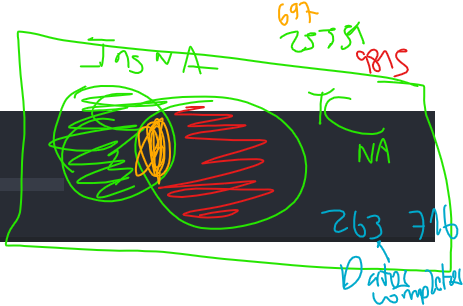

Usafemos una lógica muy parecida, pero completaremos el puntaje de ingreso con **la media**

In [37]:
# Calcular la media de PTJE_INGRESO
mean_ptje_ingreso = df_cleaned['PTJE_INGRESO'].mean()

# Rellenar los valores NaN en PTJE_INGRESO con la media
df_cleaned['PTJE_INGRESO'].fillna(mean_ptje_ingreso, inplace=True)

# Verificar que no hay valores NaN en PTJE_INGRESO
df_cleaned['PTJE_INGRESO'].isna().sum()

0

Solo quedan 10544 records con NA en la variab;e TipoColegio, esas vamos a recuperarlas usando knn imputation

In [38]:
df_cleaned[(df_cleaned['PTJE_INGRESO'].isna()) & (df_cleaned['TIPO_COLEGIO'].isna())]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC


In [39]:
df_cleaned[(df_cleaned['PTJE_INGRESO'].isna()) & (df_cleaned['TIPO_COLEGIO'].notna())]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC


In [40]:
df_cleaned[(df_cleaned['PTJE_INGRESO'].notna()) & (df_cleaned['TIPO_COLEGIO'].isna())]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,131.123219,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,131.123219,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,131.123219,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,131.123219,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,NaN,131.123219,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296684,37246.0,37468.0,M,20020724.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2019-01,S,NaN,179.000000,...,IND2-4,2.48,N,0.0,136.0,30.0,4.7950,218.0,0.0,0.0
298783,29983.0,29391.0,F,19990418.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cerro Colorado,2016-01,S,NaN,128.000000,...,IND10-1,15.35,S,0.0,75.0,30.0,15.5300,217.0,0.0,0.0
299169,29983.0,29391.0,F,19990418.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cerro Colorado,2016-01,S,NaN,128.000000,...,CIV8-1,15.71,S,0.0,75.0,30.0,15.5300,217.0,0.0,0.0
299413,37246.0,37468.0,M,20020724.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2019-01,S,NaN,179.000000,...,IND2-3,2.13,N,0.0,102.0,30.0,4.7950,218.0,0.0,0.0


Ahora podemos realizar el KNN imputation, juntemos los 2 dfs

In [41]:
from sklearn.impute import KNNImputer
import numpy as np

# Reemplazar '//' por NaN
df_cleaned.replace('//', np.nan, inplace=True)

# Seleccionar las columnas relevantes para la imputación
columns_to_impute = ['PTJE_INGRESO', 'TIPO_COLEGIO', 'COD_ALUMNO', 'BECA_VIGENTE']
df_combined_impute = df_cleaned[columns_to_impute]

# Convertir las columnas categóricas a numéricas
df_combined_impute = pd.get_dummies(df_combined_impute, columns=['TIPO_COLEGIO'])

# Aplicar KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_combined_imputed = imputer.fit_transform(df_combined_impute)

# Convertir el resultado de nuevo a un DataFrame
df_combined_imputed = pd.DataFrame(df_combined_imputed, columns=df_combined_impute.columns)

# Revertir la codificación one-hot para 'TIPO_COLEGIO'
tipo_colegio_columns = [col for col in df_combined_imputed.columns if col.startswith('TIPO_COLEGIO_')]
df_combined_imputed['TIPO_COLEGIO'] = df_combined_imputed[tipo_colegio_columns].idxmax(axis=1)
df_combined_imputed['TIPO_COLEGIO'] = df_combined_imputed['TIPO_COLEGIO'].str.replace('TIPO_COLEGIO_', '')

# Actualizar el dataframe original con los valores imputados
df_cleaned.update(df_combined_imputed[['PTJE_INGRESO', 'TIPO_COLEGIO']])

df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.123219,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.123219,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.123219,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.123219,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.123219,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012.0,31356.0,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.000000,...,IND9-2,15.26,S,0.0,68.0,30.0,13.2567,217.0,0.0,0.0
299778,26191.0,25960.0,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.000000,...,IND9-2,16.69,S,0.0,68.0,30.0,14.3500,217.0,0.0,0.0
299779,25883.0,26100.0,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.000000,...,IND9-2,16.91,S,0.0,68.0,30.0,15.9857,217.0,0.0,0.0
299780,29759.0,29405.0,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.000000,...,IND9-2,16.69,S,0.0,68.0,30.0,15.8629,217.0,0.0,0.0


In [42]:
#redondear el PTJE_INGRESO A 2 DECIMALES
df_cleaned['PTJE_INGRESO'] = df_cleaned['PTJE_INGRESO'].round(2)
df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012.0,31356.0,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.00,...,IND9-2,15.26,S,0.0,68.0,30.0,13.2567,217.0,0.0,0.0
299778,26191.0,25960.0,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.00,...,IND9-2,16.69,S,0.0,68.0,30.0,14.3500,217.0,0.0,0.0
299779,25883.0,26100.0,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.00,...,IND9-2,16.91,S,0.0,68.0,30.0,15.9857,217.0,0.0,0.0
299780,29759.0,29405.0,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.00,...,IND9-2,16.69,S,0.0,68.0,30.0,15.8629,217.0,0.0,0.0


In [43]:
#query para ver los records con PROCEDENCIA = '//' y RESIDENCIA = '//'
df_cleaned[(df_cleaned['PROCEDENCIA'] != '//') & (df_cleaned['RESIDENCIA'] == '//')]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC


In [44]:
nas_per_column, nas_per_row = count_nas(df_cleaned)
print("Columns with NAs:\n", nas_per_column)
print("\nNAs per row:\n", nas_per_row)

Columns with NAs:
 Series([], dtype: int64)

NAs per row:
 Series([], dtype: int64)


## Separación de columnas

Pasaremos la fecha de nac a un formato %%DAY-MONTH-YEAR%%. Y separaremos la Procedencia y residencia en 3 columnas que contengan, el departamento, la provincia y el distrito.

In [45]:
df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,20040813.0,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012.0,31356.0,F,19970130.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.00,...,IND9-2,15.26,S,0.0,68.0,30.0,13.2567,217.0,0.0,0.0
299778,26191.0,25960.0,F,19980321.0,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.00,...,IND9-2,16.69,S,0.0,68.0,30.0,14.3500,217.0,0.0,0.0
299779,25883.0,26100.0,F,19970114.0,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.00,...,IND9-2,16.91,S,0.0,68.0,30.0,15.9857,217.0,0.0,0.0
299780,29759.0,29405.0,F,19961229.0,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.00,...,IND9-2,16.69,S,0.0,68.0,30.0,15.8629,217.0,0.0,0.0


In [46]:
# Convertir la columna FECHA_NACIMIENTO a string para facilitar la manipulación

df_prueba = df_cleaned.copy()
df_prueba['FECHA_NACIMIENTO'] = df_cleaned['FECHA_NACIMIENTO'].astype(str)

# Crear una nueva columna con el formato day-month-year
df_prueba['FECHA_NACIMIENTO'] = df_prueba['FECHA_NACIMIENTO'].apply(lambda x: f"{x[6:8]}-{x[4:6]}-{x[0:4]}")

# Convertir la nueva columna a tipo int
df_prueba['FECHA_NACIMIENTO'] = df_prueba['FECHA_NACIMIENTO'].str.replace('-', '').astype(int)

# ahora el FECHA_NACIMIENTO_DMY es un int, quiero que sea un datetime
df_prueba['FECHA_NACIMIENTO'] = pd.to_datetime(df_prueba['FECHA_NACIMIENTO'], format='%d%m%Y', errors='coerce')
df_prueba.head()

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0


Reemplazar

In [47]:
# reemplazar los valores de FECHA_NACIMIENTO de df_prueba en df_cleaned
df_cleaned['FECHA_NACIMIENTO'] = df_prueba['FECHA_NACIMIENTO']
df_cleaned

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PROCEDENCIA,RESIDENCIA,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,...,GRUPO,NOTA,APROBO,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC
0,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,7.26,N,5.0,48.0,30.0,7.7933,217.0,0.0,0.0
1,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,7.35,N,0.0,64.0,30.0,7.7933,217.0,0.0,0.0
2,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,10.20,N,0.0,48.0,30.0,7.7933,217.0,0.0,0.0
3,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B1,12.29,S,6.0,48.0,30.0,7.7933,217.0,0.0,0.0
4,2742.0,3441.0,M,2004-08-13,Amazonas/Bagua/La Peca,Arequipa/Arequipa/Arequipa,2004-01,S,Fuera del Perú,131.12,...,IND-1B,8.50,N,8.0,64.0,30.0,7.7933,217.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299777,23012.0,31356.0,F,1997-01-30,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Jose Luis Bustamante Y Rivero,2016-02,S,Privada Particular,338.00,...,IND9-2,15.26,S,0.0,68.0,30.0,13.2567,217.0,0.0,0.0
299778,26191.0,25960.0,F,1998-03-21,Cusco/Espinar/Espinar,Arequipa/Arequipa/Miraflores,2015-01,S,Privada Particular,135.00,...,IND9-2,16.69,S,0.0,68.0,30.0,14.3500,217.0,0.0,0.0
299779,25883.0,26100.0,F,1997-01-14,Arequipa/Arequipa/Arequipa,Arequipa/Arequipa/Cayma,2015-01,S,Privada Parroquial,113.00,...,IND9-2,16.91,S,0.0,68.0,30.0,15.9857,217.0,0.0,0.0
299780,29759.0,29405.0,F,1996-12-29,Arequipa/Arequipa/Socabaya,Arequipa/Arequipa/Socabaya,2016-01,S,Privada Particular,105.00,...,IND9-2,16.69,S,0.0,68.0,30.0,15.8629,217.0,0.0,0.0


In [48]:
# Separar la columna PROCEDENCIA en tres columnas
df_cleaned[['Departamento_Procedencia', 'Provincia_Procedencia', 'Distrito_Procedencia']] = df_cleaned['PROCEDENCIA'].str.split('/', expand=True)

# Separar la columna RESIDENCIA en tres columnas
df_cleaned[['Departamento_Residencia', 'Provincia_Residencia', 'Distrito_Residencia']] = df_cleaned['RESIDENCIA'].str.split('/', expand=True)

# Eliminar las columnas PROCEDENCIA y RESIDENCIA
df_cleaned = df_cleaned.drop(['PROCEDENCIA', 'RESIDENCIA'], axis=1)

# Mostrar el dataframe actualizado
df_cleaned.head()

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,...,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC,Departamento_Procedencia,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia
0,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,Amazonas,Bagua,La Peca,Arequipa,Arequipa,Arequipa
1,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,Amazonas,Bagua,La Peca,Arequipa,Arequipa,Arequipa
2,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,Amazonas,Bagua,La Peca,Arequipa,Arequipa,Arequipa
3,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,Amazonas,Bagua,La Peca,Arequipa,Arequipa,Arequipa
4,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,Amazonas,Bagua,La Peca,Arequipa,Arequipa,Arequipa


Para poder matchear correctamente, hagamos un UPPER CASE a todas las columnas de PROCEDENCIA Y DISTRITO

In [49]:
# Convertir las columnas de PROCEDENCIA y RESIDENCIA a mayúsculas
df_cleaned['Departamento_Procedencia'] = df_cleaned['Departamento_Procedencia'].str.upper()
df_cleaned['Provincia_Procedencia'] = df_cleaned['Provincia_Procedencia'].str.upper()
df_cleaned['Distrito_Procedencia'] = df_cleaned['Distrito_Procedencia'].str.upper()

df_cleaned['Departamento_Residencia'] = df_cleaned['Departamento_Residencia'].str.upper()
df_cleaned['Provincia_Residencia'] = df_cleaned['Provincia_Residencia'].str.upper()
df_cleaned['Distrito_Residencia'] = df_cleaned['Distrito_Residencia'].str.upper()

# Mostrar el dataframe actualizado
df_cleaned.head()

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,...,PONDERADO,CRED_GRADUACION,BECA_VIGENTE,NOTA_ENCUESTA_DOC,Departamento_Procedencia,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia
0,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA
1,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA
2,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA
3,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA
4,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,7.7933,217.0,0.0,0.0,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA


Guardar en un csv 

In [50]:
df_cleaned.to_csv('Desercion_clean.csv', index=False)

## ENRIQUECIMIENTO DE DATOS

Para enriquecer nuestra data ocuparemos un dataset de la INEI, el cual muestra índices de desarrollo humano en distintos lugares del país.

In [51]:
ind = pd.read_csv("index_Dist.csv", encoding='latin1')
ind.head(10)

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,POBLACION,SUPERFICIE,DENSIDAD,IDH,POR_POBREZA,POR_POBREZA_EXTREMA
0,10202,AMAZONAS,BAGUA,ARAMANGO,12498,809,15.4,0.3612,38.5,19.3
1,10201,AMAZONAS,BAGUA,BAGUA,27358,151,181.2,0.5841,16.2,4.5
2,10203,AMAZONAS,BAGUA,COPALLIN,5732,99,57.9,0.4672,24.5,11.2
3,10204,AMAZONAS,BAGUA,EL PARCO,1752,18,94.8,0.4890,35.2,12.2
4,10205,AMAZONAS,BAGUA,IMAZA,40716,4431,9.2,0.2981,53.9,48.9
5,10206,AMAZONAS,BAGUA,LA PECA a/,10119,144,70.1,0.4906,34.8,21.8
6,10302,AMAZONAS,BONGARA,CHISQUILLA,520,175,3.0,0.4750,42.2,22.6
7,10303,AMAZONAS,BONGARA,CHURUJA,387,33,11.6,0.5159,20.8,1.9
8,10304,AMAZONAS,BONGARA,COROSHA,981,46,21.5,0.3959,54.8,24.6
9,10305,AMAZONAS,BONGARA,CUISPES,818,111,7.4,0.2994,45.8,12.8


In [52]:
ind['DISTRITO'] = ind['DISTRITO'].replace('LA PECA a/', 'LA PECA')
ind.head(10)

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,POBLACION,SUPERFICIE,DENSIDAD,IDH,POR_POBREZA,POR_POBREZA_EXTREMA
0,10202,AMAZONAS,BAGUA,ARAMANGO,12498,809,15.4,0.3612,38.5,19.3
1,10201,AMAZONAS,BAGUA,BAGUA,27358,151,181.2,0.5841,16.2,4.5
2,10203,AMAZONAS,BAGUA,COPALLIN,5732,99,57.9,0.4672,24.5,11.2
3,10204,AMAZONAS,BAGUA,EL PARCO,1752,18,94.8,0.4890,35.2,12.2
4,10205,AMAZONAS,BAGUA,IMAZA,40716,4431,9.2,0.2981,53.9,48.9
5,10206,AMAZONAS,BAGUA,LA PECA,10119,144,70.1,0.4906,34.8,21.8
6,10302,AMAZONAS,BONGARA,CHISQUILLA,520,175,3.0,0.4750,42.2,22.6
7,10303,AMAZONAS,BONGARA,CHURUJA,387,33,11.6,0.5159,20.8,1.9
8,10304,AMAZONAS,BONGARA,COROSHA,981,46,21.5,0.3959,54.8,24.6
9,10305,AMAZONAS,BONGARA,CUISPES,818,111,7.4,0.2994,45.8,12.8


Verifiquemos si debemos limpiar el dataset

In [53]:
# Verificar valores nulos por columna
nas_per_column_ind = ind.isna().sum()
print("Valores nulos por columna en el dataframe 'ind':\n", nas_per_column_ind)

# Verificar valores nulos por fila
nas_per_row_ind = ind.isna().sum(axis=1)
print("\nValores nulos por fila en el dataframe 'ind':\n", nas_per_row_ind)

Valores nulos por columna en el dataframe 'ind':
 UBIGEO                 0
DEPARTAMENTO           0
PROVINCIA              0
DISTRITO               0
POBLACION              0
SUPERFICIE             0
DENSIDAD               0
IDH                    0
POR_POBREZA            0
POR_POBREZA_EXTREMA    0
dtype: int64

Valores nulos por fila en el dataframe 'ind':
 0       0
1       0
2       0
3       0
4       0
       ..
1869    0
1870    0
1871    0
1872    0
1873    0
Length: 1874, dtype: int64


Se hará un join mediante las columnas: DEPARTAMENTO, PROVINCIA, DISTRITO, y traerán consigo las columnas

1. POBLACION
2. IDH
3. POR_POBREZA
4. POR_POBREZA_EXTREMA

In [54]:
# Realiza el join utilizando un inner join para asegurar que solo se mantengan las filas coincidentes
df_enriched = df_cleaned.merge(
    ind[['PROVINCIA', 'DISTRITO', 'POBLACION', 'IDH', 'POR_POBREZA', 'POR_POBREZA_EXTREMA']],
    left_on=['Provincia_Procedencia', 'Distrito_Procedencia'],
    right_on=['PROVINCIA', 'DISTRITO'],
    how='inner'
)

# Elimina las columnas utilizadas para el join del DataFrame derecho
df_enriched.drop(columns=['PROVINCIA', 'DISTRITO'], inplace=True)

# Muestra el DataFrame enriquecido
df_enriched

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,...,Departamento_Procedencia,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia,POBLACION,IDH,POR_POBREZA,POR_POBREZA_EXTREMA
0,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
1,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
2,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
3,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
4,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299369,42166.0,42065.0,M,2003-06-04,2020-01,S,Pública Sector Educación,271.00,INGENIERÍA INDUSTRIAL,Regular,...,PUNO,YUNGUYO,UNICACHI,AREQUIPA,AREQUIPA,CERRO COLORADO,1176,0.3799,42.6,16.0
299370,42166.0,42065.0,M,2003-06-04,2020-01,S,Pública Sector Educación,271.00,INGENIERÍA INDUSTRIAL,Regular,...,PUNO,YUNGUYO,UNICACHI,AREQUIPA,AREQUIPA,CERRO COLORADO,1176,0.3799,42.6,16.0
299371,42166.0,42065.0,M,2003-06-04,2020-01,S,Pública Sector Educación,271.00,INGENIERÍA INDUSTRIAL,Regular,...,PUNO,YUNGUYO,UNICACHI,AREQUIPA,AREQUIPA,CERRO COLORADO,1176,0.3799,42.6,16.0
299372,42166.0,42065.0,M,2003-06-04,2020-01,S,Pública Sector Educación,271.00,INGENIERÍA INDUSTRIAL,Regular,...,PUNO,YUNGUYO,UNICACHI,AREQUIPA,AREQUIPA,CERRO COLORADO,1176,0.3799,42.6,16.0


Pero más adelante veremos que hay fechas de nacimiento catalagodas como NaT, los cuales no tienen un patrón común, debido a que su periodo de ingreso varía, y su ESTADO suele ser Separado o Retirado, esto quiere decir que hicieron dropout, por lo que **asumiremos que tienen una edad de 18 años aproximadamente**. Así que rellenaremos su fecha de nacimiento con fechas de esos años.

In [55]:
df_enriched[df_enriched['FECHA_NACIMIENTO'].isna()]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,...,Departamento_Procedencia,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia,POBLACION,IDH,POR_POBREZA,POR_POBREZA_EXTREMA
701,4394.0,4641.0,M,NaT,2006-01,S,Privada Particular,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,MIRAFLORES,93576,0.7622,0.7,0.0
702,4394.0,4641.0,M,NaT,2006-01,S,Privada Particular,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,MIRAFLORES,93576,0.7622,0.7,0.0
703,4394.0,4641.0,M,NaT,2006-01,S,Privada Particular,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,MIRAFLORES,93576,0.7622,0.7,0.0
704,4394.0,4641.0,M,NaT,2006-01,S,Privada Particular,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,MIRAFLORES,93576,0.7622,0.7,0.0
705,4394.0,4641.0,M,NaT,2006-01,S,Privada Particular,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,MIRAFLORES,93576,0.7622,0.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292008,24224.0,23959.0,M,NaT,2014-01,S,Privada Particular,120.00,INGENIERÍA INDUSTRIAL,Retirado,...,CUSCO,CHUMBIVILCAS,SANTO TOMAS,AREQUIPA,AREQUIPA,LA JOYA,24028,0.3393,44.5,8.0
292009,24224.0,23959.0,M,NaT,2014-01,S,Privada Particular,120.00,INGENIERÍA INDUSTRIAL,Retirado,...,CUSCO,CHUMBIVILCAS,SANTO TOMAS,AREQUIPA,AREQUIPA,LA JOYA,24028,0.3393,44.5,8.0
292010,24224.0,23959.0,M,NaT,2014-01,S,Privada Particular,120.00,INGENIERÍA INDUSTRIAL,Retirado,...,CUSCO,CHUMBIVILCAS,SANTO TOMAS,AREQUIPA,AREQUIPA,LA JOYA,24028,0.3393,44.5,8.0
292011,24224.0,23959.0,M,NaT,2014-01,S,Privada Particular,120.00,INGENIERÍA INDUSTRIAL,Retirado,...,CUSCO,CHUMBIVILCAS,SANTO TOMAS,AREQUIPA,AREQUIPA,LA JOYA,24028,0.3393,44.5,8.0


In [56]:
# rellenar los NaT en la columna FECHA_NACIMIENTO restando 
# el año de ingreso - 17 o 18 (aplicar random para 17 o 18), 
# además certificar que aquellos con el mismo COD_ALUMNO tengan la misma fecha de nacimiento

import random
import numpy as np
import pandas as pd

months = np.arange(1, 13)
days = np.arange(1, 29)

# Convertir la columna FECHA_NACIMIENTO a datetime
df_enriched['FECHA_NACIMIENTO'] = pd.to_datetime(df_enriched['FECHA_NACIMIENTO'], errors='coerce')
df_enriched['PER_INGRESO_DT'] = pd.to_datetime(df_enriched['PER_INGRESO'], errors='coerce')

# Diccionario para almacenar las fechas de nacimiento por COD_ALUMNO
birth_dates = {}

# Reemplazar los NaT en la columna FECHA_NACIMIENTO
for idx, row in df_enriched.iterrows():
    if pd.isnull(row['FECHA_NACIMIENTO']):
        cod_alumno = row['COD_ALUMNO']
        if cod_alumno not in birth_dates:
            # Seleccionar un valor aleatorio entre 17 y 18
            random_year = random.choice([17, 18])
            # Calcular el año de nacimiento
            birth_year = row['PER_INGRESO_DT'].year - random_year
            # Generar una fecha de nacimiento aleatoria
            birth_date = pd.Timestamp(year=birth_year, 
                                      month=random.choice(months), 
                                      day=random.choice(days))
            # Almacenar la fecha de nacimiento en el diccionario
            birth_dates[cod_alumno] = birth_date
        else:
            # Reutilizar la fecha de nacimiento del diccionario
            birth_date = birth_dates[cod_alumno]
        
        # Actualizar la fecha de nacimiento en el DataFrame
        df_enriched.loc[idx, 'FECHA_NACIMIENTO'] = birth_date
        
#dropear la columna PER_INGRESO_DT
df_enriched.drop(columns=['PER_INGRESO_DT'], inplace=True)

Verifiquemos si tenemos aún datos nulos o ya están completos todos

In [57]:
df_enriched[df_enriched['FECHA_NACIMIENTO'].isna()]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,...,Departamento_Procedencia,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia,POBLACION,IDH,POR_POBREZA,POR_POBREZA_EXTREMA


In [58]:
df_enriched[df_enriched['COD_ALUMNO']==8100.0]

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,...,Departamento_Procedencia,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia,POBLACION,IDH,POR_POBREZA,POR_POBREZA_EXTREMA
5240,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
5241,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
5242,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
5243,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
5244,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
5252,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
5253,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
20737,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
20738,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0
21069,7312.0,8100.0,F,1990-02-17,2008-01,S,Fuera del Perú,127.0,INGENIERÍA INDUSTRIAL,Abandono,...,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,SOCABAYA,93576,0.7622,0.7,0.0


Guardar también un csv la data enriquecida

In [59]:
df_enriched.to_csv('Desercion_clean_enriched.csv', index=False)

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

Ahora con la data limpia, vamos aplicar un análisis exploratorio de los datos.

### 1. Relación entre semestres cursados y aprobados

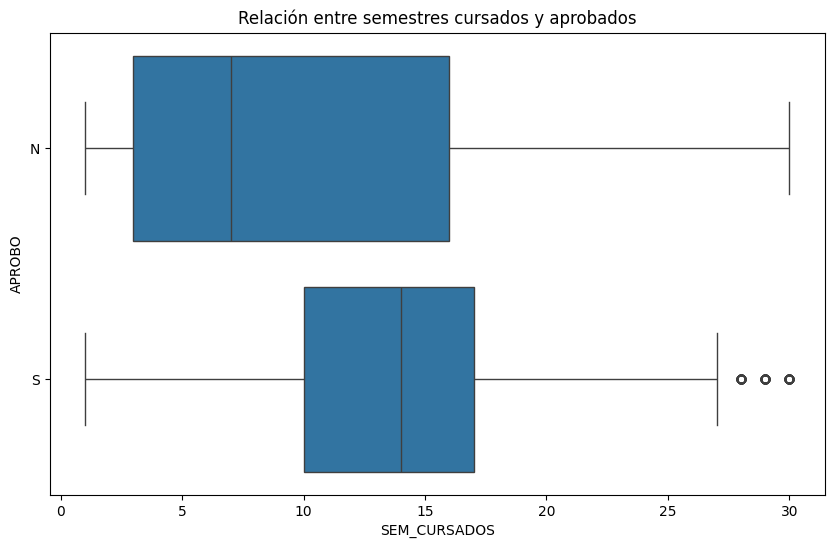

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Desercion_clean_enriched.csv")

# Plot la relación entre SEM_CURSADOS y APROBO
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEM_CURSADOS', y='APROBO', data=df)
plt.title('Relación entre semestres cursados y aprobados')
plt.xlabel('SEM_CURSADOS')
plt.ylabel('APROBO')
plt.show()


## **INSIGHTS**

- Los estudiantes que no aprueban los cursos (N) tienen una mayor variabilidad en los semestres cursados. Algunos de ellos abandonan después de cursar más de 25-30 semestres. Esto sugiere que algunos alumnos permanecen en la universidad durante mucho tiempo sin completar su trayectoria académica de manera efectiva.
Por otro lado, los estudiantes que aprueban los cursos (S) tienden a completar menos semestres (la mayoría están alrededor de los 10-15 semestres), con menos valores atípicos.

=> Para contrafactuales

- **Estrategia de retención**: Una posible estrategia basada en este análisis sería identificar a tiempo a los alumnos con baja proporción de aprobaciones y ofrecerles tutorías o programas de apoyo para evitar que se estanquen en semestres largos sin progreso.

- **Contrafactuales útiles**: Los contrafactuales podrían enfocarse en incrementar la proporción de cursos aprobados (por ejemplo, elevarla de 0.5 a 0.7), lo cual parece correlacionarse con menores tasas de deserción. Así, los alumnos que se acercan a la frontera de deserción podrían ser incentivados a mejorar su rendimiento académico.

### 2. Relación entre semestres cursados y el ponderado obtenido

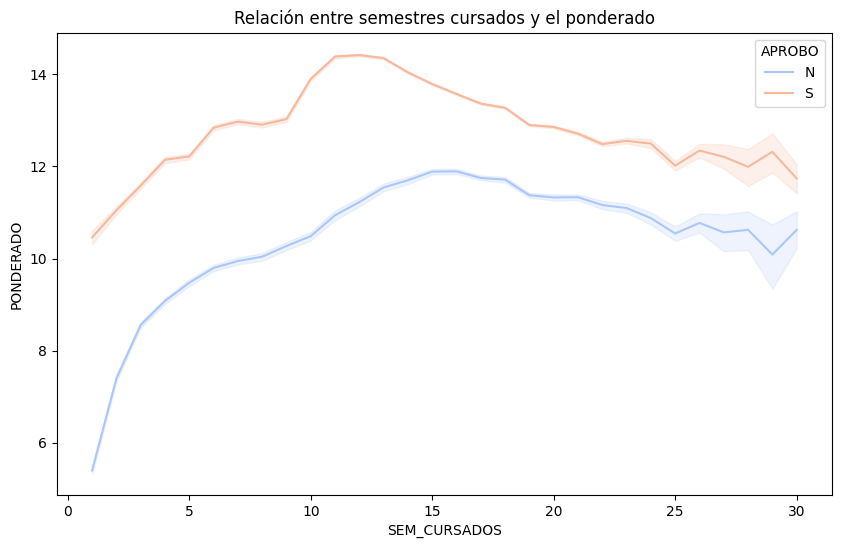

In [61]:
# Plot la relación entre SEM_CURSADOS y PONDERADO
plt.figure(figsize=(10, 6))
sns.lineplot(x='SEM_CURSADOS', y='PONDERADO', data=df, hue='APROBO', palette='coolwarm')
plt.title('Relación entre semestres cursados y el ponderado')
plt.xlabel('SEM_CURSADOS')
plt.ylabel('PONDERADO')
plt.legend(title='APROBO')
plt.show()

## **INSIGHTS**

- Los estudiantes que aprobaron (S), muestran un rendimiento más alto y consistente en promedio ponderado (PONDERADO), con valores que se estabilizan alrededor de 13-14 tras los primeros 10 semestres. A pesar de que su desempeño decrece levemente hacia los semestres finales (20-30), siguen manteniendo un nivel superior comparado con los que no aprueban.

- Los estudiantes que no aprobaron (N), presentan un promedio ponderado más bajo desde el inicio, con valores inferiores a 10 en los primeros semestres y estabilizándose apenas por encima de 10 después del semestre 10.
El rendimiento académico tiende a decrecer gradualmente hacia los semestres finales, lo que podría indicar problemas de progresión académica.

- Los estudiantes que aprueban (S) muestran una clara ventaja en su desempeño ponderado desde los primeros semestres.
La diferencia de rendimiento es clara entre ambos grupos, lo que sugiere que **los alumnos con bajo rendimiento temprano podrían ser más propensos a la deserción si no se interviene a tiempo.**

=> Para contrafactuales

- **Estrategia de intervención temprana**: Identificar a los estudiantes con rendimiento bajo en los primeros semestres y ofrecer apoyo académico (tutorías, acompañamiento) podría ser clave para evitar que caigan en una espiral descendente.
Los contrafactuales podrían enfocarse en mejorar el promedio ponderado en los primeros 10 semestres, lo que parece correlacionarse con un menor riesgo de abandono.

- **Ajuste de metas**: Para los estudiantes avanzados con bajo rendimiento, los contrafactuales podrían sugerir optimizar la carga académica o reducir las recursaciones para mantener su rendimiento por encima de 10-12.

### 3. Relación entre semestres cursados y las horas de inasistencia

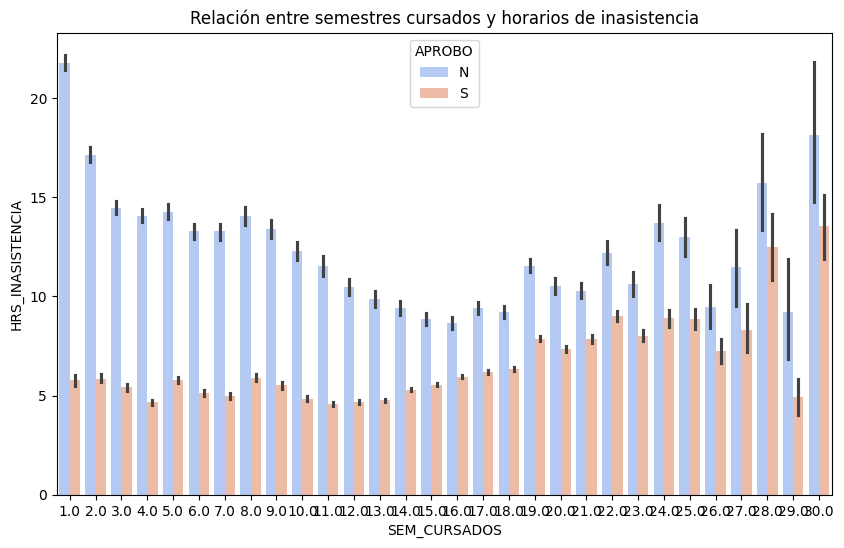

In [62]:
# Plot la relación entre SEM_CURSADOS y HRS_INASISTENCIA
plt.figure(figsize=(10, 6))
sns.barplot(x='SEM_CURSADOS', y='HRS_INASISTENCIA', data=df, hue='APROBO', palette='coolwarm')
plt.title('Relación entre semestres cursados y horarios de inasistencia')
plt.xlabel('SEM_CURSADOS')
plt.ylabel('HRS_INASISTENCIA')
plt.legend(title='APROBO')
plt.show()

## **INSIGHTS**

- Aquellos que no aprobaron(N) promedio, presentan más horas de inasistencia en todos los semestres comparado con los que sí aprobaron (S). En los primeros semestres, la inasistencia puede llegar a superar las 20 horas, lo que sugiere que los estudiantes en esta categoría enfrentan problemas de asistencia desde el principio de su carrera.

- Aquellos que aprobaron(S) muestran menores horas de inasistencia, con un promedio bastante constante alrededor de 5 horas por semestre. Aunque hay cierta variación, las horas de inasistencia de los aprobados se mantienen considerablemente más bajas que las de los no aprobados a lo largo de toda su trayectoria.

=> Para contrafactuales

- **Reducción de horas de inasistencia:** Un contrafactual útil podría consistir en reducir las horas de inasistencia, ya que existe una clara correlación entre alta inasistencia y no aprobación. Por ejemplo, los contrafactuales podrían sugerir disminuir las inasistencias en un 20-30% en los primeros semestres para cambiar el pronóstico hacia una mayor probabilidad de retención.

- **Intervención en semestres iniciales:** Dado que las inasistencias altas se manifiestan desde los primeros semestres, monitorear y ofrecer incentivos para mantener una asistencia adecuada durante las primeras etapas de la carrera podría ser clave para evitar deserciones futuras.

Los contrafactuales podrían enfocarse en fomentar la asistencia regular mediante campañas de motivación o asesoramiento personalizado. Esto sería especialmente efectivo en los primeros semestres, donde parece haber un impacto significativo en la probabilidad de éxito.

### 4. Relación entre el departamento de procedencia y aprobados

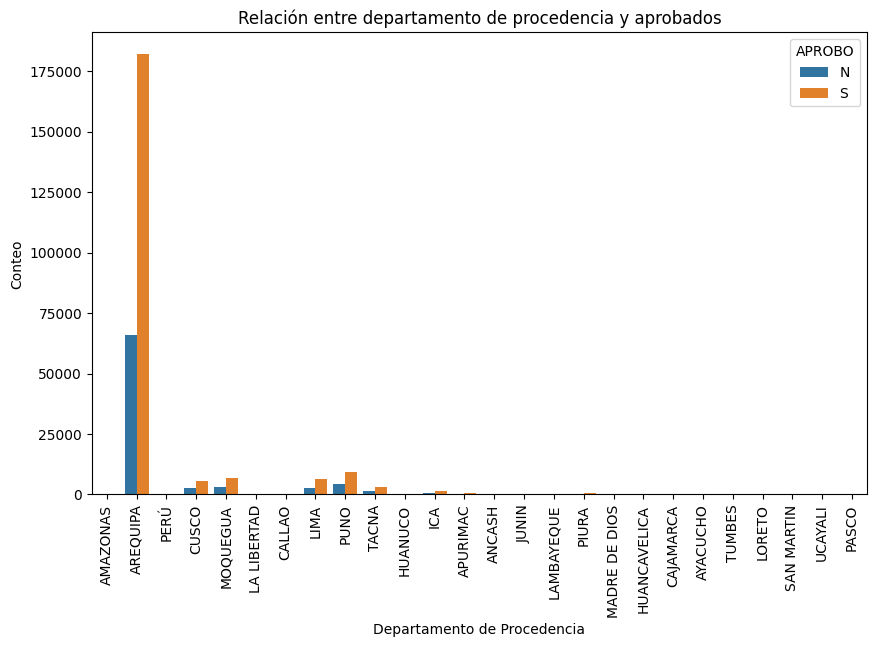

In [63]:
# Plot la relación entre DEPARTAMENTO_PROCEDENCIA y APROBO
plt.figure(figsize=(10, 6))
sns.countplot(x='Departamento_Procedencia', hue='APROBO', data=df)
plt.title('Relación entre departamento de procedencia y aprobados')
plt.xlabel('Departamento de Procedencia')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.legend(title='APROBO')
plt.show()

## **INSIGHT**

- **Concentración masiva en Arequipa**: La mayoría de los alumnos, tanto los que aprobaron (S) como los que no aprobaron (N), provienen de Arequipa. Esto refleja que la universidad tiene un enfoque o atracción local fuerte hacia este departamento.
Sin embargo, se observa una cantidad considerable de alumnos que no aprobaron en comparación con los que aprobaron. Esto sugiere que no todos los estudiantes locales tienen el mismo rendimiento y puede ser necesario intervenir localmente con estrategias de apoyo más específicas. Sin embargo, se observa una cantidad considerable de alumnos que no aprobaron en comparación con los que aprobaron. Esto sugiere que no todos los estudiantes locales tienen el mismo rendimiento y puede ser necesario intervenir localmente con estrategias de apoyo más específicas.

=> Propuestas contrafactuales:

- Aumentar la proporción de aprobaciones para los estudiantes locales (por ejemplo, pasando de 0.5 a 0.7).
- Implementar programas de tutoría o acompañamiento académico focalizados en esta región, dado que el rendimiento de los alumnos locales parece estar más comprometido que el de los foráneos.

### 5. Relación entre el tipo de curso y aprobados

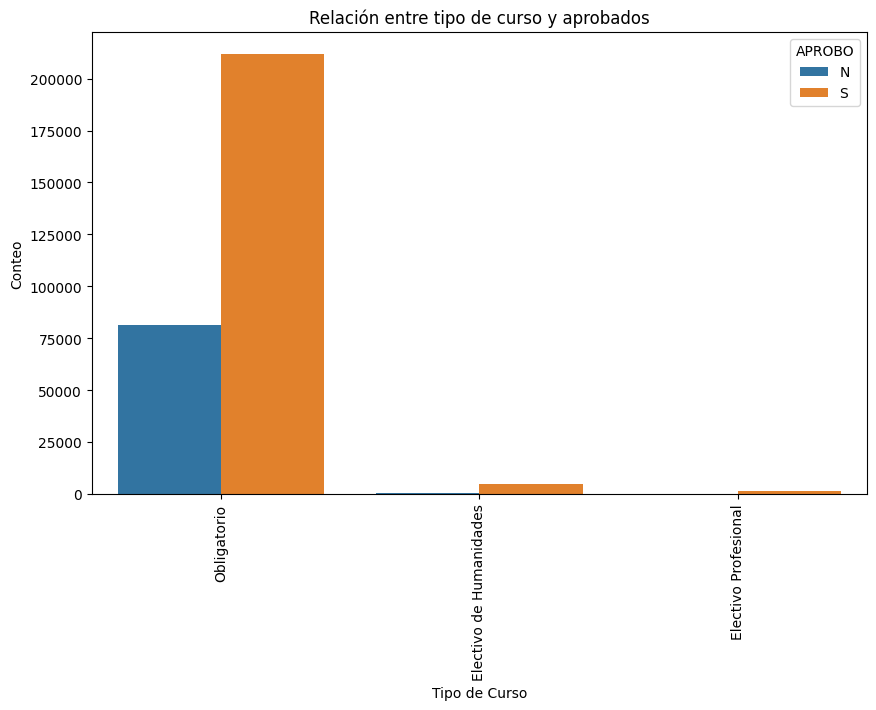

In [64]:
# Plot la relación entre TIPO_CURSO y APROBO
plt.figure(figsize=(10, 6))
sns.countplot(x='TIPO_CURSO', hue='APROBO', data=df)
plt.title('Relación entre tipo de curso y aprobados')
plt.xlabel('Tipo de Curso')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.legend(title='APROBO')
plt.show()

## **Insights**

- Tanto los electivos de humanidades como los electivos profesionales muestran un conteo mucho menor de inscripciones. Además, en estos cursos se observa una alta tasa de aprobación (S), con casi nulas inscripciones con resultado N.
Esto puede indicar que los estudiantes suelen inscribirse en electivos en etapas avanzadas, cuando ya tienen más experiencia y control sobre su carga académica, o que estos cursos son percibidos como menos exigentes.

- La gran mayoría de los estudiantes (tanto los que aprueban como los que no) están inscritos en cursos obligatorios. Esto es natural, ya que estos cursos son indispensables para avanzar en la carrera. Sin embargo, **la tasa de no aprobación en cursos obligatorios es considerable (alrededor de 75,000 estudiantes), lo que sugiere que los cursos obligatorios representan un cuello de botella para muchos alumnos.**


=> Para contrafactuales

- Focalizar esfuerzos en cursos obligatorios: Los contrafactuales podrían enfocarse en aumentar la probabilidad de aprobación en cursos obligatorios, ya que es aquí donde se presenta la mayor tasa de no aprobación. Esto podría lograrse proponiendo intervenciones específicas como: 

  * Acompañamiento académico adicional o tutorías en los cursos más complicados.
  * Reducción de carga académica inicial: Sugerir a los alumnos que se concentren en menos cursos obligatorios al inicio para aumentar su probabilidad de éxito.

## **CONCLUSIÓN**

Se lograron obtener buenos insights y como guiarnos para manejar los contrafactuales, pero también hay limitaciones, en primera instancia que no hay un diccionario de datos de la data, es cierto que gran parte de la data es sencilla de interpretar pero columnas acerca de los grupos o los nombres del curso serían útiles después de un exhaustivo proceso como lo fuera asignar pesos a cada curso.

## CONSTRUCCIÓN DEL PIPELINE

Procederemos a realizar la construcción del pipeline, con el objetivo de encontrar el feature vector de cada alumno.

In [65]:
df = pd.read_csv("Desercion_clean_enriched.csv")
df.head()

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,...,Departamento_Procedencia,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia,POBLACION,IDH,POR_POBREZA,POR_POBREZA_EXTREMA
0,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
1,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
2,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
3,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
4,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8


Para ello debemos saber que variable vamos a predecir, nuestra variable a predecir es ESTADO, para ello crearemos una nueva columna y, que sea binaria y maneje:

0 = Dropout

1 = Hold

**MANTENER**

EGRESADO -> ACABARON AL CARRERA

REGULARES -> EN LA CARRERA


**DROPOUT**

SEPARADO -> ALGO PASÓ CON AL UNIVERSIDAD O EL ENTORNO

ABANDONO -> ¿POR QUÉ LO HICIERON?

RETIRADO -> RETENERLOS PARA QUE APRUEBEN

TRASLADO -> REDUCIR LOS CAMBIOS DE CARRERA EN LA CARRERA DE ING INDUSTRIAL



**NO CONSIDERAR**

RESERVA -> ENTRARÁN A LA CARRERA (No sabemos cual será su siguiente decisión como tal, en todo caso nuestro pipeline toma el último estado del alumno)

EXPULSADO

FALLECIDO

In [66]:
# value counts de ESTADO
df['ESTADO'].value_counts()

Egresado     138399
Separado      67512
Regular       64979
Abandono      16213
Retirado       9378
Traslado       2049
Reserva         601
Fallecido       209
Expulsado        34
Name: ESTADO, dtype: int64


Crearemos la variable y, la cual será nuestra variable a predecir en el modelo.


Se borrarán las finales con ESTADO = Fallecido, no se puede usar contrafactuales en esos alumnos.

In [67]:
# Eliminar las filas donde el estado es 'Fallecido'
df = df[df['ESTADO'] != 'Fallecido']
df = df[df['ESTADO'] != 'Expulsado']
df = df[df['ESTADO'] != 'Reserva'] # Reserva es un estado que no se puede considerar como deserción ni como mantenimiento

# Mostrar el dataframe actualizado
df

,COD_PERSONA,COD_ALUMNO,SEXO,FECHA_NACIMIENTO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,...,Departamento_Procedencia,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia,POBLACION,IDH,POR_POBREZA,POR_POBREZA_EXTREMA
0,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
1,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
2,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
3,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
4,2742.0,3441.0,M,2004-08-13,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,...,AMAZONAS,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299369,42166.0,42065.0,M,2003-06-04,2020-01,S,Pública Sector Educación,271.00,INGENIERÍA INDUSTRIAL,Regular,...,PUNO,YUNGUYO,UNICACHI,AREQUIPA,AREQUIPA,CERRO COLORADO,1176,0.3799,42.6,16.0
299370,42166.0,42065.0,M,2003-06-04,2020-01,S,Pública Sector Educación,271.00,INGENIERÍA INDUSTRIAL,Regular,...,PUNO,YUNGUYO,UNICACHI,AREQUIPA,AREQUIPA,CERRO COLORADO,1176,0.3799,42.6,16.0
299371,42166.0,42065.0,M,2003-06-04,2020-01,S,Pública Sector Educación,271.00,INGENIERÍA INDUSTRIAL,Regular,...,PUNO,YUNGUYO,UNICACHI,AREQUIPA,AREQUIPA,CERRO COLORADO,1176,0.3799,42.6,16.0
299372,42166.0,42065.0,M,2003-06-04,2020-01,S,Pública Sector Educación,271.00,INGENIERÍA INDUSTRIAL,Regular,...,PUNO,YUNGUYO,UNICACHI,AREQUIPA,AREQUIPA,CERRO COLORADO,1176,0.3799,42.6,16.0


Agrupemos

Las variables categóricas no van a variar, a excepción del ESTADO, tomaremos el último registro de cada alumno, ya que fue su decisión final. Por otro lado, se obtiene acumulación de horas, proporciones o porcentajes de la mayoría de variables numéricas.

In [68]:
# Convertir la columna FECHA_NACIMIENTO a datetime
df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], errors='coerce')

# Calcular la edad en base al año de nacimiento y el año actual (2024)
df['EDAD'] = 2021 - df['FECHA_NACIMIENTO'].dt.year

# Eliminar la columna FECHA_NACIMIENTO
df.drop(columns=['FECHA_NACIMIENTO'], inplace=True)

# Mostrar el dataframe actualizado
df.head()

,COD_PERSONA,COD_ALUMNO,SEXO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,SEM_ALUMNO,...,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia,POBLACION,IDH,POR_POBREZA,POR_POBREZA_EXTREMA,EDAD
0,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17
1,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17
2,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17
3,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17
4,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298530 entries, 0 to 299373
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   COD_PERSONA               298530 non-null  float64
 1   COD_ALUMNO                298530 non-null  float64
 2   SEXO                      298530 non-null  object 
 3   PER_INGRESO               298530 non-null  object 
 4   ESTADO_CIVIL              298530 non-null  object 
 5   TIPO_COLEGIO              298530 non-null  object 
 6   PTJE_INGRESO              298530 non-null  float64
 7   CARRERA                   298530 non-null  object 
 8   ESTADO                    298530 non-null  object 
 9   SEM_ALUMNO                298530 non-null  float64
 10  SEM_CURSADOS              298530 non-null  float64
 11  CANT_RESERVAS             298530 non-null  float64
 12  PER_MATRICULA             298530 non-null  object 
 13  COD_CURSO                 298530 non-null  f

edad mínima = 17
edad máxima = 52


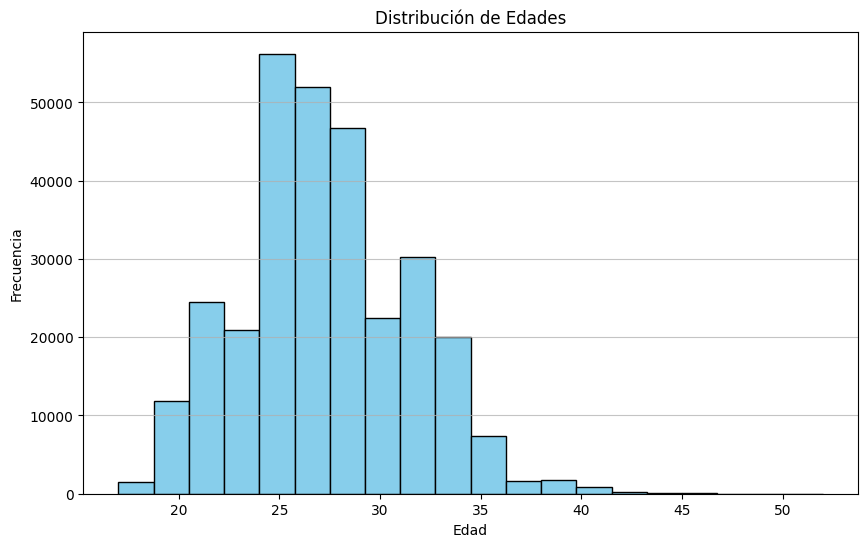

In [70]:
# histograma de edades
import matplotlib.pyplot as plt

print(f'edad mínima = {df["EDAD"].min()}')
print(f'edad máxima = {df["EDAD"].max()}')

plt.figure(figsize=(10, 6))
plt.hist(df['EDAD'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Aplicar label encoder a TIPO_CURSO

In [71]:
#Label encoder a la columna TIPO_CURSO
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
label_encoder = LabelEncoder()

# Codificar la columna TIPO_CURSO
df['TIPO_CURSO'] = label_encoder.fit_transform(df['TIPO_CURSO']) # Obligatorio = 2, Electivo de Humanidades = 1, Electivo Profesional = 0 

print("Mapeo de clases:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} -> {i}")

# Mostrar el dataframe actualizado
df.head()

Mapeo de clases:
Electivo Profesional -> 0
Electivo de Humanidades -> 1
Obligatorio -> 2


,COD_PERSONA,COD_ALUMNO,SEXO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,CARRERA,ESTADO,SEM_ALUMNO,...,Provincia_Procedencia,Distrito_Procedencia,Departamento_Residencia,Provincia_Residencia,Distrito_Residencia,POBLACION,IDH,POR_POBREZA,POR_POBREZA_EXTREMA,EDAD
0,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17
1,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17
2,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17
3,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17
4,2742.0,3441.0,M,2004-01,S,Fuera del Perú,131.12,INGENIERÍA INDUSTRIAL,Separado,1.0,...,BAGUA,LA PECA,AREQUIPA,AREQUIPA,AREQUIPA,10119,0.4906,34.8,21.8,17


In [72]:
# guardar en un csv

df.to_csv('Desercion_clean_enriched.csv', index=False)

### PIPELINE: dataframe agrupado

In [73]:
# Agregar las columnas relevantes
df_grouped = df.groupby('COD_ALUMNO').agg({
    'SEXO': 'first',  # Sexo no cambia, tomamos el primero
    'EDAD': 'last',  # Fecha de nacimiento tampoco cambia
    'ESTADO': 'last',  # Tomar el último estado
    'SEM_CURSADOS': 'max',  # Semestres cursados totales
    'CANT_RESERVAS': 'sum',  # Total de reservas de cursos
    'NOTA': 'mean',  # Promedio de nota
    'APROBO': lambda x: (x == 'S').mean(),  # Proporción de cursos aprobados
    'CREDITOS': 'sum',  # Créditos totales cursados
    'HRS_INASISTENCIA': 'sum',  # Horas totales de inasistencia
    'HRS_CURSO': 'sum',  # Horas totales de curso
    'PRCTJE_INASISTENCIA': 'mean',  # Porcentaje promedio de inasistencia
    'PONDERADO': 'mean',  # Promedio ponderado final
    'BECA_VIGENTE': 'max',  # Si tuvo alguna beca
    'IDH': 'first',  # IDH del lugar de procedencia
    'POR_POBREZA': 'first',  # Porcentaje de pobreza del lugar de procedencia
    'POR_POBREZA_EXTREMA': 'first',  # Porcentaje de pobreza extrema del lugar de procedencia
    'TIPO_CURSO': lambda x: (x == 2).mean() # Proporción de cursos obligatorios
}).reset_index()

df_grouped = df_grouped.rename(columns={'TIPO_CURSO': 'PROP_OBLIGATORIOS'})
df_grouped['CAMBIO_RENDIMIENTO'] = df.groupby('COD_ALUMNO')['NOTA'].transform(lambda x: x.iloc[-1] - x.iloc[0])


#round in 2 decimals
df_grouped['NOTA'] = df_grouped['NOTA'].round(2)
df_grouped['APROBO'] = df_grouped['APROBO'].round(2)
df_grouped['PRCTJE_INASISTENCIA'] = df_grouped['PRCTJE_INASISTENCIA'].round(2)
df_grouped['PONDERADO'] = df_grouped['PONDERADO'].round(2)
df_grouped['PROP_OBLIGATORIOS'] = df_grouped['PROP_OBLIGATORIOS'].round(2)

# pasar a ints
df_grouped['COD_ALUMNO'] = df_grouped['COD_ALUMNO'].astype(int)
df_grouped['SEM_CURSADOS'] = df_grouped['SEM_CURSADOS'].astype(int)
df_grouped['CANT_RESERVAS'] = df_grouped['CANT_RESERVAS'].astype(int)
df_grouped['CREDITOS'] = df_grouped['CREDITOS'].astype(int)
df_grouped['HRS_INASISTENCIA'] = df_grouped['HRS_INASISTENCIA'].astype(int)
df_grouped['HRS_CURSO'] = df_grouped['HRS_CURSO'].astype(int)
df_grouped['BECA_VIGENTE'] = df_grouped['BECA_VIGENTE'].astype(int)


# Crear la nueva columna 'y'
df_grouped['y'] = df_grouped['ESTADO'].apply(lambda x: 1 if x in ['Egresado', 'Regular'] else 0)

df_grouped.head()

,COD_ALUMNO,SEXO,EDAD,ESTADO,SEM_CURSADOS,CANT_RESERVAS,NOTA,APROBO,CREDITOS,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,BECA_VIGENTE,IDH,POR_POBREZA,POR_POBREZA_EXTREMA,PROP_OBLIGATORIOS,CAMBIO_RENDIMIENTO,y
0,2041,M,34,Retirado,1,0,10.80,0.57,22,13,432,30.71,9.80,0,0.6739,6.4,0.5,1.0,2.44,0
1,2106,F,36,Retirado,1,0,0.04,0.00,22,317,432,30.71,0.03,0,0.7622,0.7,0.0,1.0,2.44,0
2,2385,M,36,Separado,1,0,2.61,0.00,22,115,432,30.71,2.49,0,0.6591,8.2,0.2,1.0,2.44,0
3,2387,M,34,Separado,1,0,5.19,0.00,22,74,432,30.71,4.87,0,0.7622,0.7,0.0,1.0,2.44,0
4,2392,F,17,Abandono,1,0,12.53,0.57,22,22,432,30.71,12.44,0,0.4906,34.8,21.8,1.0,2.44,0


In [74]:
df_grouped['PROP_OBLIGATORIOS'].unique()

array([1.  , 0.97, 0.96, 0.99, 0.98, 0.93, 0.95, 0.94, 0.9 , 0.86, 0.75,
       0.89, 0.91, 0.83, 0.92, 0.88, 0.82, 0.8 , 0.85, 0.77, 0.67, 0.71,
       0.84, 0.76, 0.81, 0.4 , 0.87, 0.69, 0.78])

In [75]:
df_grouped

,COD_ALUMNO,SEXO,EDAD,ESTADO,SEM_CURSADOS,CANT_RESERVAS,NOTA,APROBO,CREDITOS,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,BECA_VIGENTE,IDH,POR_POBREZA,POR_POBREZA_EXTREMA,PROP_OBLIGATORIOS,CAMBIO_RENDIMIENTO,y
0,2041,M,34,Retirado,1,0,10.80,0.57,22,13,432,30.71,9.80,0,0.6739,6.4,0.5,1.0,2.44,0
1,2106,F,36,Retirado,1,0,0.04,0.00,22,317,432,30.71,0.03,0,0.7622,0.7,0.0,1.0,2.44,0
2,2385,M,36,Separado,1,0,2.61,0.00,22,115,432,30.71,2.49,0,0.6591,8.2,0.2,1.0,2.44,0
3,2387,M,34,Separado,1,0,5.19,0.00,22,74,432,30.71,4.87,0,0.7622,0.7,0.0,1.0,2.44,0
4,2392,F,17,Abandono,1,0,12.53,0.57,22,22,432,30.71,12.44,0,0.4906,34.8,21.8,1.0,2.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8655,43636,M,23,Regular,1,0,13.89,0.88,30,0,680,30.00,15.26,0,0.7622,0.7,0.0,1.0,1.47,1
8656,43655,M,21,Regular,1,0,10.08,0.50,22,0,510,30.00,9.41,0,0.6668,4.7,0.8,1.0,1.47,1
8657,43657,F,18,Regular,2,0,13.00,0.83,22,0,510,30.00,12.79,0,0.7622,0.7,0.0,1.0,1.47,1
8658,43660,F,18,Regular,3,0,16.11,1.00,30,0,645,30.00,15.16,0,0.7622,0.7,0.0,1.0,1.47,1


Veamos si en el proceso se creo datos nulos o no

In [76]:
df_grouped.isna().sum()

COD_ALUMNO             0
SEXO                   0
EDAD                   0
ESTADO                 0
SEM_CURSADOS           0
CANT_RESERVAS          0
NOTA                   0
APROBO                 0
CREDITOS               0
HRS_INASISTENCIA       0
HRS_CURSO              0
PRCTJE_INASISTENCIA    0
PONDERADO              0
BECA_VIGENTE           0
IDH                    0
POR_POBREZA            0
POR_POBREZA_EXTREMA    0
PROP_OBLIGATORIOS      0
CAMBIO_RENDIMIENTO     0
y                      0
dtype: int64

In [77]:
#query fecha de nacimiento es NA
df_grouped[df_grouped['EDAD'].isna()]

,COD_ALUMNO,SEXO,EDAD,ESTADO,SEM_CURSADOS,CANT_RESERVAS,NOTA,APROBO,CREDITOS,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,BECA_VIGENTE,IDH,POR_POBREZA,POR_POBREZA_EXTREMA,PROP_OBLIGATORIOS,CAMBIO_RENDIMIENTO,y


In [78]:
df_grouped.to_csv('Desercion_clean_grouped.csv', index=False)

Visualizemos la variación sin estandarizar

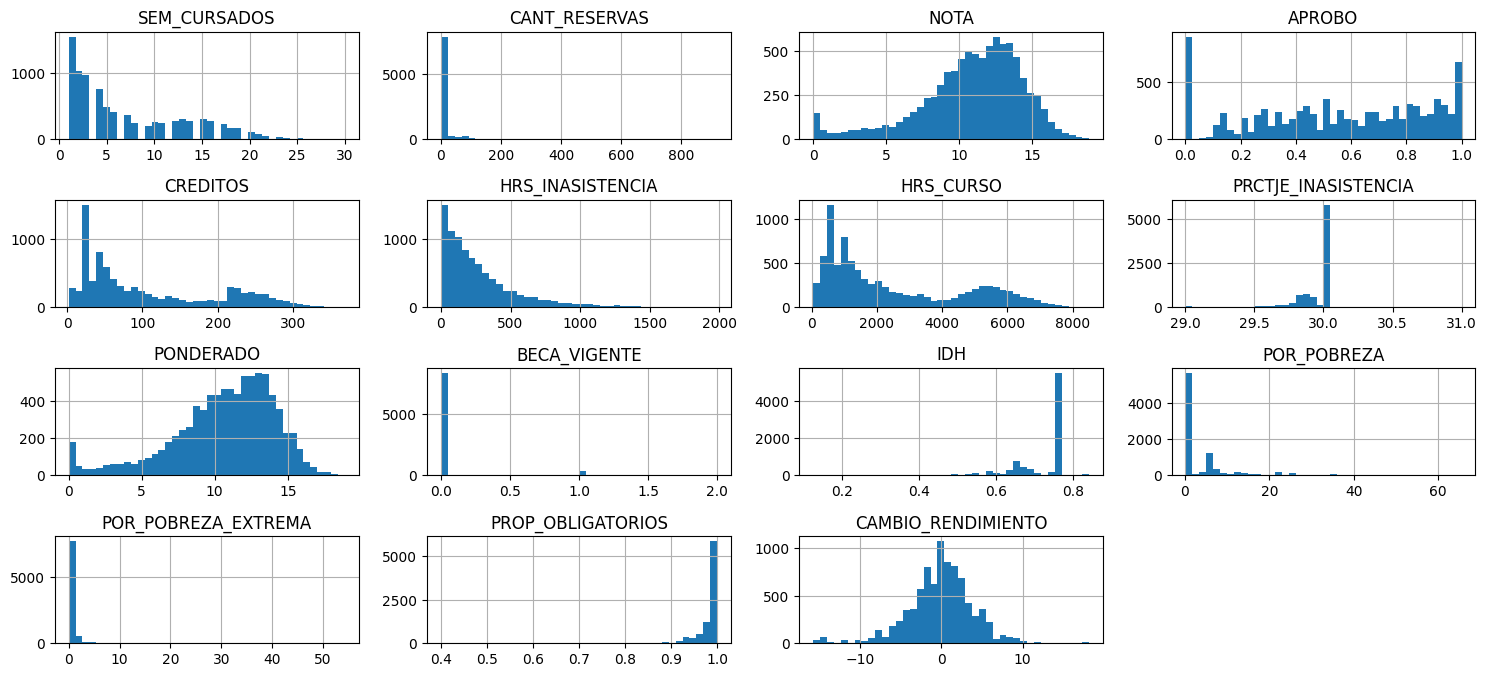

In [79]:
import matplotlib.pyplot as plt

# Definir las columnas numéricas estandarizadas
numerical_columns = ['SEM_CURSADOS', 'CANT_RESERVAS', 'NOTA', 'APROBO', 'CREDITOS', 'HRS_INASISTENCIA', 'HRS_CURSO', 'PRCTJE_INASISTENCIA', 
                     'PONDERADO', 'BECA_VIGENTE', 'IDH', 'POR_POBREZA', 'POR_POBREZA_EXTREMA','PROP_OBLIGATORIOS','CAMBIO_RENDIMIENTO']

# Crear histogramas para cada columna numérica estandarizada
df_grouped[numerical_columns].hist(bins=40, figsize=(15, 10), layout=(6, 4))
plt.tight_layout()
plt.show()

**NO ocuparemos el escalamiento, debido a que el modelo con el que se entrenará y testeará los contrafactuales será un RANDOM FOREST**.

In [80]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8660 entries, 0 to 8659
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COD_ALUMNO           8660 non-null   int32  
 1   SEXO                 8660 non-null   object 
 2   EDAD                 8660 non-null   int64  
 3   ESTADO               8660 non-null   object 
 4   SEM_CURSADOS         8660 non-null   int32  
 5   CANT_RESERVAS        8660 non-null   int32  
 6   NOTA                 8660 non-null   float64
 7   APROBO               8660 non-null   float64
 8   CREDITOS             8660 non-null   int32  
 9   HRS_INASISTENCIA     8660 non-null   int32  
 10  HRS_CURSO            8660 non-null   int32  
 11  PRCTJE_INASISTENCIA  8660 non-null   float64
 12  PONDERADO            8660 non-null   float64
 13  BECA_VIGENTE         8660 non-null   int32  
 14  IDH                  8660 non-null   float64
 15  POR_POBREZA          8660 non-null   f

# Entrenamiento del modelo

Para ello, testearemos con un **random forest**.

¿Por qué un random forest?

1. Alta precisión y robustez, combina múltiples árboles de decisión para reducir el overfitting y mejorar la generalización del modelo.

2. Manejo de datos desabalanceados.

3. Uso de GridSearch para encontrar los mejores features.

4. Escalable y versátil para todo tipo de todos.



No tomaremos en cuenta la **FECHA_NACIMIENTO**. Por su parte hemos preferido usar **la edad** con la que ingresó a la universidad por primera vez.


Podemos ocupar la data escalada, pero un modelo como random forest, **no necesita un escalamiento al manejar los datos desbalanceados**.

In [81]:
df_grouped = pd.read_csv("Desercion_clean_grouped.csv")


Mapeo de SEXO:
F -> 0
M -> 1

Columnas en df_grouped:
Index(['COD_ALUMNO', 'SEXO', 'EDAD', 'ESTADO', 'SEM_CURSADOS', 'CANT_RESERVAS',
       'NOTA', 'APROBO', 'CREDITOS', 'HRS_INASISTENCIA', 'HRS_CURSO',
       'PRCTJE_INASISTENCIA', 'PONDERADO', 'BECA_VIGENTE', 'IDH',
       'POR_POBREZA', 'POR_POBREZA_EXTREMA', 'PROP_OBLIGATORIOS',
       'CAMBIO_RENDIMIENTO', 'y'],
      dtype='object')
F1-score: 0.95


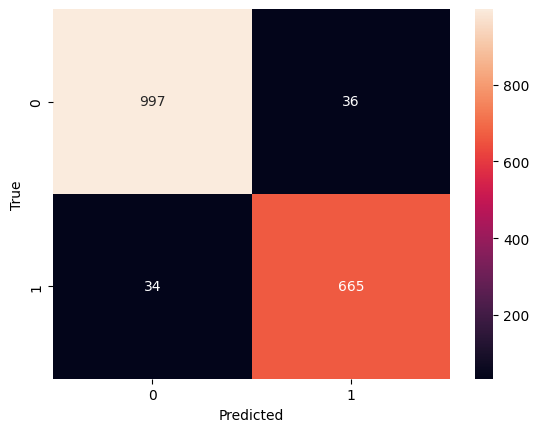

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Inicializar los codificadores
label_encoder_sexo = LabelEncoder()

# Aplicar el Label Encoding
df_grouped['SEXO'] = label_encoder_sexo.fit_transform(df_grouped['SEXO'])

# Imprimir el mapeo de SEXO
print("\nMapeo de SEXO:")
for i, class_name in enumerate(label_encoder_sexo.classes_):
    print(f"{class_name} -> {i}")

# Verificar las columnas disponibles después del encoding
print("\nColumnas en df_grouped:")
print(df_grouped.columns)

# Dataset final listo para el modelo (asegúrate de que las columnas eliminadas no sean necesarias en tu modelo)
X = df_grouped.drop(columns=['COD_ALUMNO', 'y','ESTADO','CANT_RESERVAS', 'POR_POBREZA', 'POR_POBREZA_EXTREMA'])  # Features
y = df_grouped['y']  # Target

# Train split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparámetros a ajustar para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo Random Forest 
rf = RandomForestClassifier(random_state=42)

# Entrar el modelo
rf.fit(Xtrain, ytrain)

# Predecir en el conjunto de prueba
ypred = rf.predict(Xtest)

# Calcular el f1-score
f1 = f1_score(ytest, ypred)
print(f"F1-score: {f1}")

# matrix confussion con seaborn
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Cross-validated F1-score: 0.9456290001544202
F1-score: 0.9529243937232525


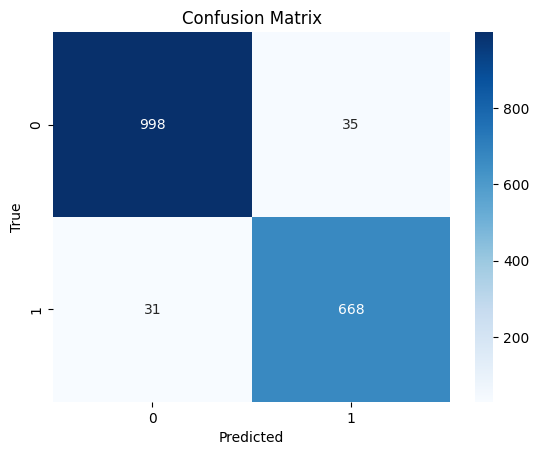

In [83]:
# Ajustar el modelo con GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(Xtrain, ytrain)

# Mejor modelo encontrado por GridSearchCV
best_rf = grid_search.best_estimator_

# Validación cruzada para evaluar el rendimiento del modelo
cv_scores = cross_val_score(best_rf, Xtrain, ytrain, cv=5, scoring='f1')
print(f"Cross-validated F1-score: {np.mean(cv_scores)}")

# Entrenar el mejor modelo con los datos de entrenamiento
best_rf.fit(Xtrain, ytrain)

# Predecir en el conjunto de prueba
ypred = best_rf.predict(Xtest)

# Calcular el f1-score
f1 = f1_score(ytest, ypred)
print(f"F1-score: {f1}")

# Generar la matriz de confusión
cm = confusion_matrix(ytest, ypred)

# Visualizar la matriz de confusión con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Guardemos el modelo

In [84]:
import pickle

pickle.dump(best_rf, open('best_desertion_random_forest_model.pkl', 'wb'))
pickle.dump(rf, open('rf_desertion_random_forest_model.pkl', 'wb'))

Carguemos el modelo

In [85]:
#cargar el modelo
loaded_model = pickle.load(open('best_desertion_random_forest_model.pkl', 'rb'))

# Predecir en el conjunto de prueba
ypred = loaded_model.predict(Xtest)

# Calcular el f1-score
f1 = f1_score(ytest, ypred)

### CONTRAFACTUALES

In [86]:
from dice_ml import Dice
import dice_ml

# Preparar DiCE para generar contrafactuales con el modelo ajustado
dice_data = dice_ml.Data(dataframe=X.join(y), 
                         continuous_features=['APROBO', 'NOTA', 'PRCTJE_INASISTENCIA',
                                              'PONDERADO', 'IDH','PROP_OBLIGATORIOS','CAMBIO_RENDIMIENTO'], outcome_name='y')
dice_model = dice_ml.Model(model=loaded_model, backend="sklearn")

# Definir los rangos permitidos para algunas características
permitted_range = {
    'APROBO': [0, 1],  # Proporción de aprobados debe estar entre 0 y 1
    'NOTA': [11.0, 20.0],   # Notas deben estar entre 11 y 20 (según tu sistema de calificaciones)
    'CAMBIO_RENDIMIENTO': [0, 10],  # Cambio de rendimiento debe estar entre 0 y 10
    'APROBO': [0.6, 1],  # Proporción de aprobados debe estar entre 0 y 1
    'PRCTJE_INASISTENCIA': [0, 35] # Porcentaje de inasistencia debe estar entre 0 y 100
}

# Generar contrafactuales
dice = Dice(dice_data, dice_model)
query_instance = X.iloc[4:5]  # Asegurarse de que query_instance sea un DataFrame de una sola fila
counterfactuals = dice.generate_counterfactuals(query_instance, 
                                                total_CFs=5, 
                                                desired_class="opposite",
                                                permitted_range=permitted_range)
counterfactuals.visualize_as_dataframe()

100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

Query instance (original outcome : 0)


,SEXO,EDAD,SEM_CURSADOS,NOTA,APROBO,CREDITOS,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,BECA_VIGENTE,IDH,PROP_OBLIGATORIOS,CAMBIO_RENDIMIENTO,y
0,0,17,1,12.53,0.57,22,22,432,30.709999,12.44,0,0.4906,1.0,2.44,0



Diverse Counterfactual set (new outcome: 1)


,SEXO,EDAD,SEM_CURSADOS,NOTA,APROBO,CREDITOS,HRS_INASISTENCIA,HRS_CURSO,PRCTJE_INASISTENCIA,PONDERADO,BECA_VIGENTE,IDH,PROP_OBLIGATORIOS,CAMBIO_RENDIMIENTO,y
0,0,17,4,12.53,0.80,22,22,432,30.71,12.44,0,0.4906,1.0,2.44,1
1,0,17,23,12.53,0.57,22,22,432,30.71,12.44,0,0.4906,1.0,2.44,1
2,0,17,13,12.53,0.57,22,22,432,31.30,12.44,0,0.4906,1.0,2.44,1
3,1,17,18,12.53,0.57,22,22,432,30.71,12.44,0,0.4906,1.0,2.44,1
4,0,17,14,12.53,0.57,22,263,432,30.71,12.44,0,0.4906,1.0,2.44,0
